In [635]:
import pandas as pd
import numpy as np


In [636]:
#measures_per_country = pd.read_csv("acaps-covid-19-government-measures-dataset.csv")
measures_per_country = pd.read_csv("acaps_covid19_government_measures_dataset_updated.csv")
active_cases = pd.read_csv("country_timeseries_data_newer.csv")

uki_data = pd.read_csv("country_timeseries_data_uki.csv")

In [637]:
measures_per_country.columns = measures_per_country.columns.str.lower()
measures_per_country.drop(measures_per_country.index[15940:], inplace=True)

In [638]:
active_cases.loc[active_cases["CountryName"] == "Israel"].head(20)

UpdateId  CountryId CountryName CountryCode  Province  City  Latitude  \
0          1          1      Israel          IL       NaN   NaN     31.05   
1          2          1      Israel          IL       NaN   NaN     31.05   
2          3          1      Israel          IL       NaN   NaN     31.05   
3          4          1      Israel          IL       NaN   NaN     31.05   
4          5          1      Israel          IL       NaN   NaN     31.05   
5          6          1      Israel          IL       NaN   NaN     31.05   
6          7          1      Israel          IL       NaN   NaN     31.05   
7          8          1      Israel          IL       NaN   NaN     31.05   
8          9          1      Israel          IL       NaN   NaN     31.05   
9         10          1      Israel          IL       NaN   NaN     31.05   
10        11          1      Israel          IL       NaN   NaN     31.05   
11        12          1      Israel          IL       NaN   NaN     31.05   
12        13          1      Israel          IL       NaN   NaN     31.05   
13        14          1      Israel          IL       NaN   NaN     31.05   
14        15          1      Israel          IL       NaN   NaN     31.05   
15        16          1      Israel          IL       NaN   NaN     31.05   
16        17          1      Israel          IL       NaN   NaN     31.05   
17        18          1      Israel          IL       NaN   NaN     31.05   
18        19          1      Israel          IL       NaN   NaN     31.05   
19        20          1      Israel          IL       NaN   NaN     31.05   

    Longitude  ConfirmedCases  ActiveCases  Deaths  Recovered    DateTime  \
0       34.85               0            0       0          0  22/01/2020   
1       34.85               0            0       0          0  23/01/2020   
2       34.85               0            0       0          0  24/01/2020   
3       34.85               0            0       0          0  25/01/2020   
4       34.85               0            0       0          0  26/01/2020   
5       34.85               0            0       0          0  27/01/2020   
6       34.85               0            0       0          0  28/01/2020   
7       34.85               0            0       0          0  29/01/2020   
8       34.85               0            0       0          0  30/01/2020   
9       34.85               0            0       0          0  31/01/2020   
10      34.85               0            0       0          0  01/02/2020   
11      34.85               0            0       0          0  02/02/2020   
12      34.85               0            0       0          0  03/02/2020   
13      34.85               0            0       0          0  04/02/2020   
14      34.85               0            0       0          0  05/02/2020   
15      34.85               0            0       0          0  06/02/2020   
16      34.85               0            0       0          0  07/02/2020   
17      34.85               0            0       0          0  08/02/2020   
18      34.85               0            0       0          0  09/02/2020   
19      34.85               0            0       0          0  10/02/2020   

    CountriesCountryId  ChangeInActiveCases  
0                  NaN                    0  
1                  NaN                    0  
2                  NaN                    0  
3                  NaN                    0  
4                  NaN                    0  
5                  NaN                    0  
6                  NaN                    0  
7                  NaN                    0  
8                  NaN                    0  
9                  NaN                    0  
10                 NaN                    0  
11                 NaN                    0  
12                 NaN                    0  
13                 NaN                    0  
14                 NaN                    0  
15                 NaN          

In [639]:
#active_cases["DateTime"] = pd.to_datetime(active_cases["DateTime"], dayfirst=True)
uki_data["DateTime"] = pd.to_datetime(uki_data["DateTime"], dayfirst=True)
measures_per_country["date_implemented"] = pd.to_datetime(measures_per_country["date_implemented"], dayfirst=True)

In [640]:
#active_cases.head(50)
uki_data.head()

UpdateId  CountryId CountryName CountryCode  Province  City  Latitude  \
0     27413        237     Ireland          IE       NaN   NaN     53.41   
1     27414        237     Ireland          IE       NaN   NaN     53.41   
2     27415        237     Ireland          IE       NaN   NaN     53.41   
3     27416        237     Ireland          IE       NaN   NaN     53.41   
4     27417        237     Ireland          IE       NaN   NaN     53.41   

   Longitude  ConfirmedCases  ActiveCases  Deaths  Recovered   DateTime  \
0      -8.24               0            0       0          0 2020-01-22   
1      -8.24               0            0       0          0 2020-01-23   
2      -8.24               0            0       0          0 2020-01-24   
3      -8.24               0            0       0          0 2020-01-25   
4      -8.24               0            0       0          0 2020-01-26   

   CountriesCountryId  ChangeInActiveCases  ChangeInDeaths  
0                 NaN                    0               0  
1                 NaN                    0               0  
2                 NaN                    0               0  
3                 NaN                    0               0  
4                 NaN                    0               0

In [641]:
measures_per_country.head()

id      country  iso admin_level_name  pcode region  \
0  1.0  Afghanistan  AFG              NaN    NaN   Asia   
1  2.0  Afghanistan  AFG            Kabul    NaN   Asia   
2  3.0  Afghanistan  AFG              NaN    NaN   Asia   
3  4.0  Afghanistan  AFG              NaN    NaN   Asia   
4  5.0  Afghanistan  AFG              NaN    NaN   Asia   

                               log_type  \
0  Introduction / extension of measures   
1  Introduction / extension of measures   
2  Introduction / extension of measures   
3  Introduction / extension of measures   
4  Introduction / extension of measures   

                                 category  \
0                  Public health measures   
1                  Public health measures   
2                  Public health measures   
3  Governance and socio-economic measures   
4                       Social distancing   

                                             measure targeted_pop_group  \
0  Health screenings in airports and border cross...                 No   
1                  Isolation and quarantine policies                 No   
2                                Awareness campaigns                 No   
3  Emergency administrative structures activated ...                 No   
4                            Limit public gatherings                 No   

                    comments non_compliance date_implemented  \
0                        NaN            NaN       2020-02-12   
1                        NaN            NaN       2020-02-12   
2                        NaN            NaN       2020-02-12   
3                        NaN            NaN       2020-02-12   
4  Nevruz festival cancelled            NaN       2020-03-12   

               source source_type  \
0  Ministry of Health  Government   
1  Ministry of Health  Government   
2  Ministry of Health  Government   
3  Ministry of Health  Government   
4                  AA       Media   

                                                link  entry_date  \
0  https://moph.gov.af/en/moph-held-emergency-mee...  14/03/2020   
1  https://moph.gov.af/en/moph-held-emergency-mee...  14/03/2020   
2  https://moph.gov.af/en/moph-held-emergency-mee...  14/03/2020   
3  https://moph.gov.af/en/moph-held-emergency-mee...  14/03/2020   
4  https://www.aa.com.tr/en/asia-pacific/coronavi...  14/03/2020   

  alternative source  unnamed: 18  unnamed: 19  unnamed: 20  unnamed: 21  \
0                NaN          NaN          NaN          NaN          NaN   
1                NaN          NaN          NaN          NaN          NaN   
2                NaN          NaN          NaN          NaN          NaN   
3                NaN          NaN          NaN          NaN          NaN   
4                NaN          NaN          NaN          NaN          NaN   

   unnamed: 22  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [642]:
measures_per_country.head()

measurecount_per_country = measures_per_country["country"].value_counts()

In [643]:
measurecount_per_country["Sri Lanka"]

285

In [644]:
measures = measures_per_country[["country", "measure", "date_implemented"]]

measure_counts = measures.groupby(["country", "date_implemented"])

In [645]:
measure_counts.size()

country      date_implemented
Afghanistan  2020-01-24          1
             2020-01-26          1
             2020-01-27          2
             2020-02-01          1
             2020-02-02          2
                                ..
Zimbabwe     2020-05-17          3
             2020-05-21          1
             2020-06-09          2
             2020-06-30          1
             2020-07-28          1
Length: 7148, dtype: int64

In [646]:

measure_counts_by_date = pd.DataFrame(columns = ["country", "date_implemented", "number_of_measures"])

In [647]:
for name, group in measure_counts:
    measure_counts_by_date = measure_counts_by_date.append({"country": name[0], "date_implemented": name[1], "number_of_measures": group.measure.size}, ignore_index=True)
    

In [648]:
measure_counts_by_date.sort_values(["country", "date_implemented"]).head(20)

country date_implemented number_of_measures
0   Afghanistan       2020-01-24                  1
1   Afghanistan       2020-01-26                  1
2   Afghanistan       2020-01-27                  2
3   Afghanistan       2020-02-01                  1
4   Afghanistan       2020-02-02                  2
5   Afghanistan       2020-02-04                  2
6   Afghanistan       2020-02-06                  1
7   Afghanistan       2020-02-08                  1
8   Afghanistan       2020-02-12                  5
9   Afghanistan       2020-02-13                  1
10  Afghanistan       2020-02-20                  1
11  Afghanistan       2020-02-22                  1
12  Afghanistan       2020-02-24                  5
13  Afghanistan       2020-03-01                  5
14  Afghanistan       2020-03-02                  1
15  Afghanistan       2020-03-05                  1
16  Afghanistan       2020-03-07                  1
17  Afghanistan       2020-03-11                  1
18  Afghanistan       2020-03-12                  1
19  Afghanistan       2020-03-15                  1

In [649]:
measure_counts_by_date["cumulative_num_of_measures"] = measure_counts_by_date.groupby(["country"])["number_of_measures"].apply(lambda x: x.cumsum())

In [650]:
#measure_counts_by_date.loc[measure_counts_by_date["country"] == "Israel"].head()

In [651]:
#active_cases_by_date = active_cases[["CountryId", "CountryName", "ActiveCases", "DateTime", "ChangeInActiveCases"]]
active_cases_by_date = uki_data[["CountryId", "CountryName", "ActiveCases", "DateTime", "ChangeInActiveCases"]]

In [652]:
active_cases_by_date.loc[active_cases_by_date["CountryName"] == "United Kingdom"]

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases
192         52  United Kingdom            0 2020-01-22                    0
193         52  United Kingdom            0 2020-01-23                    0
194         52  United Kingdom            0 2020-01-24                    0
195         52  United Kingdom            0 2020-01-25                    0
196         52  United Kingdom            0 2020-01-26                    0
..         ...             ...          ...        ...                  ...
385         52  United Kingdom       254352 2020-07-27                  678
386         52  United Kingdom       254780 2020-07-28                  428
387         52  United Kingdom       255494 2020-07-29                  714
388         52  United Kingdom       256302 2020-07-30                  808
389         52  United Kingdom       257062 2020-07-31                  760

[198 rows x 5 columns]

In [653]:
from datetime import datetime

def find_num_of_measures(cases_row):
    
    print("ROW")
    print(cases_row)
    
    relevant_country = measure_counts_by_date.loc[measure_counts_by_date["country"] == cases_row.CountryName]
    
    print("Country")
    print(relevant_country)
    
    if relevant_country.empty:
        return 0
    
    measures_implemented = relevant_country.loc[relevant_country["date_implemented"] <= cases_row.DateTime].max().iloc[3]
    
    if np.isnan(measures_implemented):
        return 0
        
    print("result")
    print(measures_implemented)
    
    return measures_implemented


In [654]:
#active_cases_by_date = active_cases_by_date.drop(["implemented_measures"], axis=1)
cases = active_cases_by_date.apply(lambda row: find_num_of_measures(row), axis=1)

ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                              0
DateTime               2020-01-22 00:00:00
ChangeInActiveCases                      0
Name: 0, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3        

ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                              0
DateTime               2020-02-05 00:00:00
ChangeInActiveCases                      0
Name: 14, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3       

3098  Ireland       2020-06-29                 17                         91
ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                              0
DateTime               2020-02-21 00:00:00
ChangeInActiveCases                      0
Name: 30, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2       

3098  Ireland       2020-06-29                 17                         91
ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                             19
DateTime               2020-03-08 00:00:00
ChangeInActiveCases                      1
Name: 46, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2       

3098  Ireland       2020-06-29                 17                         91
result
6
ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                            777
DateTime               2020-03-21 00:00:00
ChangeInActiveCases                    102
Name: 59, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                 

result
35
ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                           3357
DateTime               2020-04-01 00:00:00
ChangeInActiveCases                    198
Name: 70, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                

Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3                         40
3091  Ireland       2020-04-08                  1                         41
3092  Ireland       2020-04-10                  3                         44
3093  Ireland       2020-04-17                  2                   

Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3                         40
3091  Ireland       2020-04-08                  1                         41
3092  Ireland       2020-04-10                  3                         44
3093  Ireland       2020-04-17                  2                   

ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                           4644
DateTime               2020-05-12 00:00:00
ChangeInActiveCases                     86
Name: 111, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3      

Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3                         40
3091  Ireland       2020-04-08                  1                         41
3092  Ireland       2020-04-10                  3                         44
3093  Ireland       2020-04-17                  2                   

3098  Ireland       2020-06-29                 17                         91
result
63
ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                            807
DateTime               2020-06-06 00:00:00
ChangeInActiveCases                     12
Name: 136, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03               

result
74
ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                            917
DateTime               2020-06-15 00:00:00
ChangeInActiveCases                     18
Name: 145, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04               

Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3                         40
3091  Ireland       2020-04-08                  1                         41
3092  Ireland       2020-04-10                  3                         44
3093  Ireland       2020-04-17                  2                   

Name: 172, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03                  2                         37
3090  Ireland       2020-04-04                  3                         40
3091  Ireland       2020-04-08                  1                         41
3092  Ireland       2020-04-10                  3                         44
3093  Ireland       2020-04-17             

3098  Ireland       2020-06-29                 17                         91
result
91
ROW
CountryId                              237
CountryName                        Ireland
ActiveCases                            741
DateTime               2020-07-25 00:00:00
ChangeInActiveCases                     23
Name: 185, dtype: object
Country
      country date_implemented number_of_measures cumulative_num_of_measures
3082  Ireland       2020-03-12                  2                          2
3083  Ireland       2020-03-13                  1                          3
3084  Ireland       2020-03-15                  1                          4
3085  Ireland       2020-03-16                  1                          5
3086  Ireland       2020-03-18                  1                          6
3087  Ireland       2020-03-24                 19                         25
3088  Ireland       2020-03-28                 10                         35
3089  Ireland       2020-04-03               

6821                         66  
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                              0
DateTime               2020-01-29 00:00:00
ChangeInActiveCases                      0
Name: 199, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                 

Name: 210, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom       2020-04-16                  1   
6804  United Kingdom       2020-05-10                  3   
6805  United Kingdom       2020-05-11                  3   
6806  United Kingdom       2020-05-12                  2   
6807  U

ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                              1
DateTime               2020-02-22 00:00:00
ChangeInActiveCases                      0
Name: 223, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom       2

Name: 233, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom       2020-04-16                  1   
6804  United Kingdom       2020-05-10                  3   
6805  United Kingdom       2020-05-11                  3   
6806  United Kingdom       2020-05-12                  2   
6807  U

Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom       2020-04-16                  1   
6804  United Kingdom       2020-05-10                  3   
6805  United Kingdom       2020-05-11                  3   
6806  United Kingdom       2020-05-12                  2   
6807  United Kingdom       2020-

6821                         66  
result
21
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                          15704
DateTime               2020-03-28 00:00:00
ChangeInActiveCases                   2273
Name: 258, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01       

result
22
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                          63241
DateTime               2020-04-10 00:00:00
ChangeInActiveCases                   7351
Name: 271, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingd

result
23
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                          87796
DateTime               2020-04-16 00:00:00
ChangeInActiveCases                    647
Name: 283, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingd

6821                         66  
result
23
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                         139418
DateTime               2020-04-29 00:00:00
ChangeInActiveCases                   3250
Name: 296, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01       

Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom       2020-04-16                  1   
6804  United Kingdom       2020-05-10                  3   
6805  United Kingdom       2020-05-11                  3   
6806  United Kingdom       2020-05-12                  2   
6807  United Kingdom       2020-

Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom       2020-04-16                  1   
6804  United Kingdom       2020-05-10                  3   
6805  United Kingdom       2020-05-11                  3   
6806  United Kingdom       2020-05-12                  2   
6807  United Kingdom       2020-

result
49
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                         241873
DateTime               2020-06-04 00:00:00
ChangeInActiveCases                   1626
Name: 332, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingd

6821                         66  
result
55
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                         257175
DateTime               2020-06-17 00:00:00
ChangeInActiveCases                    922
Name: 345, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01       

56
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                         239732
DateTime               2020-06-29 00:00:00
ChangeInActiveCases                 -27869
Name: 357, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom     

Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingdom       2020-04-16                  1   
6804  United Kingdom       2020-05-10                  3   
6805  United Kingdom       2020-05-11                  3   
6806  United Kingdom       2020-05-12                  2   
6807  United Kingdom       2020-

result
66
ROW
CountryId                               52
CountryName                 United Kingdom
ActiveCases                         251592
DateTime               2020-07-23 00:00:00
ChangeInActiveCases                    716
Name: 381, dtype: object
Country
             country date_implemented number_of_measures  \
6792  United Kingdom       2020-03-11                  1   
6793  United Kingdom       2020-03-13                  1   
6794  United Kingdom       2020-03-16                  5   
6795  United Kingdom       2020-03-18                  1   
6796  United Kingdom       2020-03-20                  2   
6797  United Kingdom       2020-03-21                  2   
6798  United Kingdom       2020-03-22                  1   
6799  United Kingdom       2020-03-23                  1   
6800  United Kingdom       2020-03-24                  6   
6801  United Kingdom       2020-03-25                  1   
6802  United Kingdom       2020-04-01                  1   
6803  United Kingd

In [655]:
cases.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

In [656]:
active_cases_by_date["implemented_measures"] = cases

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [657]:
active_cases_by_date

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
0          237         Ireland            0 2020-01-22                    0   
1          237         Ireland            0 2020-01-23                    0   
2          237         Ireland            0 2020-01-24                    0   
3          237         Ireland            0 2020-01-25                    0   
4          237         Ireland            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
385         52  United Kingdom       254352 2020-07-27                  678   
386         52  United Kingdom       254780 2020-07-28                  428   
387         52  United Kingdom       255494 2020-07-29                  714   
388         52  United Kingdom       256302 2020-07-30                  808   
389         52  United Kingdom       257062 2020-07-31                  760   

     implemented_measures  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
385                    66  
386                    66  
387                    66  
388                    66  
389                    66  

[390 rows x 6 columns]

In [658]:
categorical_feature_mask = measures.dtypes == object

categorical_cols = measures.columns[categorical_feature_mask].tolist()

In [659]:
categorical_cols

['country', 'measure']

In [660]:
measures_per_country['category'].astype('category')

0                        Public health measures
1                        Public health measures
2                        Public health measures
3        Governance and socio-economic measures
4                             Social distancing
                          ...                  
15935                         Social distancing
15936                     Movement restrictions
15937                         Social distancing
15938                     Movement restrictions
15939                         Social distancing
Name: category, Length: 15940, dtype: category
Categories (6, object): [Governance and socio-economic measures, Humanitarian exemption, Lockdown, Movement restrictions, Public health measures, Social distancing]

In [661]:
measures = measures_per_country[["country", "measure"]]

In [662]:
measures.dtypes

country    object
measure    object
dtype: object

In [663]:
measures["measure"] = measures["measure"].astype('category')

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [664]:
measures.dtypes

measures["measure_cats"] = measures["measure"].cat.codes

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [665]:
measures.head()

country                                            measure  \
0  Afghanistan  Health screenings in airports and border cross...   
1  Afghanistan                  Isolation and quarantine policies   
2  Afghanistan                                Awareness campaigns   
3  Afghanistan  Emergency administrative structures activated ...   
4  Afghanistan                            Limit public gatherings   

   measure_cats  
0            15  
1            18  
2             2  
3            12  
4            20

In [666]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

In [667]:
#measures['measure_label'] = le.fit_transform(measures['measure'])

In [668]:
measures.head()

country                                            measure  \
0  Afghanistan  Health screenings in airports and border cross...   
1  Afghanistan                  Isolation and quarantine policies   
2  Afghanistan                                Awareness campaigns   
3  Afghanistan  Emergency administrative structures activated ...   
4  Afghanistan                            Limit public gatherings   

   measure_cats  
0            15  
1            18  
2             2  
3            12  
4            20

In [669]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])],remainder = 'passthrough')

In [670]:
measures.head()
#measures.drop("measure", axis =1)

country                                            measure  \
0  Afghanistan  Health screenings in airports and border cross...   
1  Afghanistan                  Isolation and quarantine policies   
2  Afghanistan                                Awareness campaigns   
3  Afghanistan  Emergency administrative structures activated ...   
4  Afghanistan                            Limit public gatherings   

   measure_cats  
0            15  
1            18  
2             2  
3            12  
4            20

## Time series analysis

In [671]:
from statsmodels.tsa import stattools

In [672]:

#causality_test_data = active_cases_by_date[["ChangeInActiveCases", "implemented_measures"]].dropna()

In [673]:
#gc_res = stattools.grangercausalitytests(causality_test_data, 4)

In [674]:
from statsmodels.tsa.stattools import adfuller

In [675]:
def run_adfuller(df, column_name):
    df_trans = df[[column_name]].values.squeeze()
    result = adfuller(df_trans)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [676]:
uk_stat_active_cases_by_date = active_cases_by_date.loc[active_cases_by_date["CountryName"] == 'United Kingdom']

In [677]:
#uk_stat_active_cases = active_cases_by_date[["ChangeInActiveCases"]].values.squeeze()
uk_stat_active_cases = active_cases_by_date.loc[active_cases_by_date["CountryName"] == 'United Kingdom']
ireland_stat_active_cases = active_cases_by_date.loc[active_cases_by_date["CountryName"] == 'Ireland']

In [678]:
uk_stat_active_cases = uk_stat_active_cases[["ChangeInActiveCases"]].values.squeeze()

In [679]:
result = adfuller(uk_stat_active_cases)

In [680]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.826544
p-value: 0.054581
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


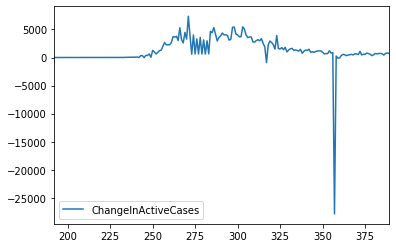

In [681]:
import matplotlib.pyplot as plt
#active_cases_by_date[["ChangeInActiveCases"]].plot()
uk_stat_active_cases_by_date[["ChangeInActiveCases"]].plot()

In [682]:
#stat_measures = active_cases_by_date[["implemented_measures"]].values.squeeze()
uk_stat_measures = uk_stat_active_cases_by_date[["implemented_measures"]].values.squeeze()

In [683]:
result_measures = adfuller(uk_stat_measures)

In [684]:
print('ADF Statistic: %f' % result_measures[0])
print('p-value: %f' % result_measures[1])
print('Critical Values:')
for key, value in result_measures[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.433588
p-value: 0.982708
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


In [685]:

causality_test_data = uk_stat_active_cases_by_date[["ChangeInActiveCases", "implemented_measures"]].pct_change().replace([np.inf, -np.inf], np.nan).dropna()

In [686]:
causality_test_data

ChangeInActiveCases  implemented_measures
242            -1.026667                   0.0
243          -172.000000                   1.0
244            -0.052632                   0.0
245            -1.043210                   0.0
246           -28.214286                   2.5
..                   ...                   ...
385            -0.072503                   0.0
386            -0.368732                   0.0
387             0.668224                   0.0
388             0.131653                   0.0
389            -0.059406                   0.0

[148 rows x 2 columns]

In [687]:
run_adfuller(causality_test_data, "ChangeInActiveCases")

ADF Statistic: -7.372664
p-value: 0.000000
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [688]:
run_adfuller(causality_test_data, "implemented_measures")

ADF Statistic: -12.170665
p-value: 0.000000
Critical Values:
	1%: -3.476
	5%: -2.881
	10%: -2.577


In [689]:
gc_res = stattools.grangercausalitytests(causality_test_data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0298  , p=0.8633  , df_denom=144, df_num=1
ssr based chi2 test:   chi2=0.0304  , p=0.8616  , df=1
likelihood ratio test: chi2=0.0304  , p=0.8616  , df=1
parameter F test:         F=0.0298  , p=0.8633  , df_denom=144, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2953  , p=0.7447  , df_denom=141, df_num=2
ssr based chi2 test:   chi2=0.6116  , p=0.7365  , df=2
likelihood ratio test: chi2=0.6104  , p=0.7370  , df=2
parameter F test:         F=0.2953  , p=0.7447  , df_denom=141, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2096  , p=0.8896  , df_denom=138, df_num=3
ssr based chi2 test:   chi2=0.6606  , p=0.8824  , df=3
likelihood ratio test: chi2=0.6591  , p=0.8828  , df=3
parameter F test:         F=0.2096  , p=0.8896  , df_denom=138, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=34.4155 , p=0.0000  

In [690]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV


In [691]:
uk = uk_stat_active_cases_by_date #.loc[uk_stat_active_cases_by_date["CountryName"] == "Israel"]

In [692]:
uk

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
192         52  United Kingdom            0 2020-01-22                    0   
193         52  United Kingdom            0 2020-01-23                    0   
194         52  United Kingdom            0 2020-01-24                    0   
195         52  United Kingdom            0 2020-01-25                    0   
196         52  United Kingdom            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
385         52  United Kingdom       254352 2020-07-27                  678   
386         52  United Kingdom       254780 2020-07-28                  428   
387         52  United Kingdom       255494 2020-07-29                  714   
388         52  United Kingdom       256302 2020-07-30                  808   
389         52  United Kingdom       257062 2020-07-31                  760   

     implemented_measures  
192                     0  
193                     0  
194                     0  
195                     0  
196                     0  
..                    ...  
385                    66  
386                    66  
387                    66  
388                    66  
389                    66  

[198 rows x 6 columns]

In [693]:
train_days = uk.iloc[:158]

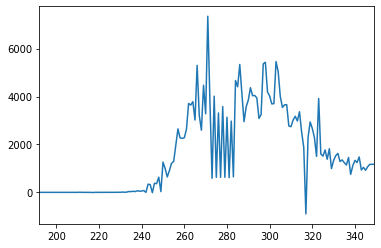

In [694]:
train_days["ChangeInActiveCases"].plot()

In [695]:
test_days = uk.iloc[159:]

In [696]:
test_days.at[357, "ChangeInActiveCases"] = (test_days.at[356, "ChangeInActiveCases"] + test_days.at[358, "ChangeInActiveCases"]) /2

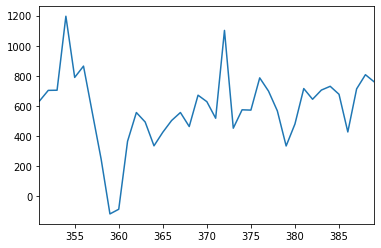

In [697]:
test_days["ChangeInActiveCases"].plot()

In [698]:
X_train =  [i for i in range(0, len(train_days.index))]
X_train = np.array(X_train).reshape(-1,1)

test_start = len(train_days.index) + 1
X_test =  [i for i in range(test_start, test_start + len(test_days.index))]
X_test = np.array(X_test).reshape(-1,1)

In [699]:

num_measures_transformed = uk["implemented_measures"].values.reshape(-1,1)
nmt_train = num_measures_transformed[:158]

In [700]:
y_train = train_days['ChangeInActiveCases'].to_numpy().reshape(-1,1)
y_test = test_days['ChangeInActiveCases'].to_numpy().reshape(-1,1)
#y_confirmed = sa_data['ConfirmedCases'].to_numpy().reshape(-1,1)
#y_deaths = sa_data['Deaths'].to_numpy().reshape(-1,1)

In [701]:
X_train = np.concatenate((X_train,nmt_train), axis = 1)

In [702]:
X_train.shape

(158, 2)

In [703]:
X_train

array([[  0,   0],
       [  1,   0],
       [  2,   0],
       [  3,   0],
       [  4,   0],
       [  5,   0],
       [  6,   0],
       [  7,   0],
       [  8,   0],
       [  9,   0],
       [ 10,   0],
       [ 11,   0],
       [ 12,   0],
       [ 13,   0],
       [ 14,   0],
       [ 15,   0],
       [ 16,   0],
       [ 17,   0],
       [ 18,   0],
       [ 19,   0],
       [ 20,   0],
       [ 21,   0],
       [ 22,   0],
       [ 23,   0],
       [ 24,   0],
       [ 25,   0],
       [ 26,   0],
       [ 27,   0],
       [ 28,   0],
       [ 29,   0],
       [ 30,   0],
       [ 31,   0],
       [ 32,   0],
       [ 33,   0],
       [ 34,   0],
       [ 35,   0],
       [ 36,   0],
       [ 37,   0],
       [ 38,   0],
       [ 39,   0],
       [ 40,   0],
       [ 41,   0],
       [ 42,   0],
       [ 43,   0],
       [ 44,   0],
       [ 45,   0],
       [ 46,   0],
       [ 47,   0],
       [ 48,   0],
       [ 49,   1],
       [ 50,   1],
       [ 51,   2],
       [ 52,

In [704]:
nmt_test = num_measures_transformed[159:]

In [705]:

kernel = ['poly']
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1]
epsilon = [0.01, 0.1]
shrinking = [True]
svm_grid = {'kernel': kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error' , cv= 3)

In [706]:
svm_search.fit(X_train, y_train)

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-v

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1],
                                        'gamma': [0.01, 0.1],
                                        'kernel': ['poly'],
                                        'shrinking': [True]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [707]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.1, 'C': 0.01}

In [708]:
svm_estimator = svm_search.best_estimator_

In [709]:
X_test = np.concatenate((X_test, nmt_test), axis = 1 )

In [710]:
#X_test = np.delete(X_test, -1, axis=1)

In [711]:
X_test.shape, nmt_test.shape

((39, 2), (39, 1))

In [712]:
predictions = svm_estimator.predict(X_test)

In [713]:
type(predictions)

numpy.ndarray

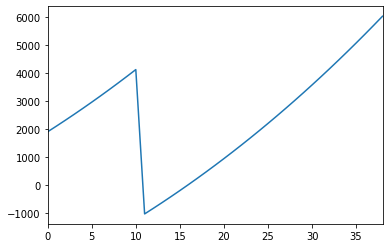

In [714]:
pd.Series(predictions).plot()

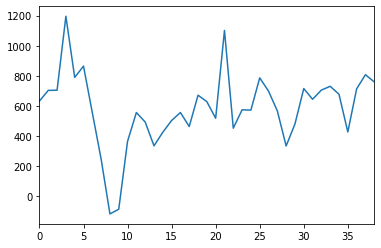

In [715]:
pd.Series(y_test.ravel()).plot()

In [716]:
#import pickle

In [717]:
#pickle.dump(svm_estimator, open("uk_change_estimator", 'wb'))

Getting feature importances

In [718]:
measures_ = measures_per_country[["country", "measure", "date_implemented"]]

In [719]:
measures_per_country.iloc[15940:]

Empty DataFrame
Columns: [id, country, iso, admin_level_name, pcode, region, log_type, category, measure, targeted_pop_group, comments, non_compliance, date_implemented, source, source_type, link, entry_date, alternative source, unnamed: 18, unnamed: 19, unnamed: 20, unnamed: 21, unnamed: 22]
Index: []

In [720]:
measures_.head()

country                                            measure  \
0  Afghanistan  Health screenings in airports and border cross...   
1  Afghanistan                  Isolation and quarantine policies   
2  Afghanistan                                Awareness campaigns   
3  Afghanistan  Emergency administrative structures activated ...   
4  Afghanistan                            Limit public gatherings   

  date_implemented  
0       2020-02-12  
1       2020-02-12  
2       2020-02-12  
3       2020-02-12  
4       2020-03-12

In [721]:
measures_["measure_category"] = measures["measure"].astype('category')

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [722]:
measures_

country                                            measure  \
0      Afghanistan  Health screenings in airports and border cross...   
1      Afghanistan                  Isolation and quarantine policies   
2      Afghanistan                                Awareness campaigns   
3      Afghanistan  Emergency administrative structures activated ...   
4      Afghanistan                            Limit public gatherings   
...            ...                                                ...   
15935     Zimbabwe                            Limit public gatherings   
15936     Zimbabwe                        Surveillance and monitoring   
15937     Zimbabwe                                   Schools closure    
15938     Zimbabwe                        Surveillance and monitoring   
15939     Zimbabwe          Closure of businesses and public services   

      date_implemented                                   measure_category  
0           2020-02-12  Health screenings in airports and border cross...  
1           2020-02-12                  Isolation and quarantine policies  
2           2020-02-12                                Awareness campaigns  
3           2020-02-12  Emergency administrative structures activated ...  
4           2020-03-12                            Limit public gatherings  
...                ...                                                ...  
15935       2020-05-17                            Limit public gatherings  
15936       2020-06-09                        Surveillance and monitoring  
15937       2020-07-28                                   Schools closure   
15938       2020-06-09                        Surveillance and monitoring  
15939       2020-06-30          Closure of businesses and public services  

[15940 rows x 4 columns]

In [723]:
measures_.dtypes

country                     object
measure                     object
date_implemented    datetime64[ns]
measure_category          category
dtype: object

In [724]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [725]:
#measures_['measure_labels'] = le.fit_transform(measures_['measure_category'])
measures_['measure_labels'] = measures_['measure_category'].cat.codes

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [726]:
measures_

country                                            measure  \
0      Afghanistan  Health screenings in airports and border cross...   
1      Afghanistan                  Isolation and quarantine policies   
2      Afghanistan                                Awareness campaigns   
3      Afghanistan  Emergency administrative structures activated ...   
4      Afghanistan                            Limit public gatherings   
...            ...                                                ...   
15935     Zimbabwe                            Limit public gatherings   
15936     Zimbabwe                        Surveillance and monitoring   
15937     Zimbabwe                                   Schools closure    
15938     Zimbabwe                        Surveillance and monitoring   
15939     Zimbabwe          Closure of businesses and public services   

      date_implemented                                   measure_category  \
0           2020-02-12  Health screenings in airports and border cross...   
1           2020-02-12                  Isolation and quarantine policies   
2           2020-02-12                                Awareness campaigns   
3           2020-02-12  Emergency administrative structures activated ...   
4           2020-03-12                            Limit public gatherings   
...                ...                                                ...   
15935       2020-05-17                            Limit public gatherings   
15936       2020-06-09                        Surveillance and monitoring   
15937       2020-07-28                                   Schools closure    
15938       2020-06-09                        Surveillance and monitoring   
15939       2020-06-30          Closure of businesses and public services   

       measure_labels  
0                  15  
1                  18  
2                   2  
3                  12  
4                  20  
...               ...  
15935              20  
15936              32  
15937              29  
15938              32  
15939               7  

[15940 rows x 5 columns]

In [727]:
df = pd.get_dummies(measures_["measure_labels"])

In [728]:
df.head()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   38  39  40  41  
0   0   0   0   0  
1   0   0   0   0  
2   0   0   0   0  
3   0   0   0   0  
4   0   0   0   0

In [729]:
test = measures_.join(pd.get_dummies(measures_["measure_labels"]))

In [730]:
test

country                                            measure  \
0      Afghanistan  Health screenings in airports and border cross...   
1      Afghanistan                  Isolation and quarantine policies   
2      Afghanistan                                Awareness campaigns   
3      Afghanistan  Emergency administrative structures activated ...   
4      Afghanistan                            Limit public gatherings   
...            ...                                                ...   
15935     Zimbabwe                            Limit public gatherings   
15936     Zimbabwe                        Surveillance and monitoring   
15937     Zimbabwe                                   Schools closure    
15938     Zimbabwe                        Surveillance and monitoring   
15939     Zimbabwe          Closure of businesses and public services   

      date_implemented                                   measure_category  \
0           2020-02-12  Health screenings in airports and border cross...   
1           2020-02-12                  Isolation and quarantine policies   
2           2020-02-12                                Awareness campaigns   
3           2020-02-12  Emergency administrative structures activated ...   
4           2020-03-12                            Limit public gatherings   
...                ...                                                ...   
15935       2020-05-17                            Limit public gatherings   
15936       2020-06-09                        Surveillance and monitoring   
15937       2020-07-28                                   Schools closure    
15938       2020-06-09                        Surveillance and monitoring   
15939       2020-06-30          Closure of businesses and public services   

       measure_labels  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0                  15  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   
1                  18  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
2                   2  0  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   
3                  12  0  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   
4                  20  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
...               ... .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..   
15935              20  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
15936              32  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
15937              29  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
15938              32  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   
15939               7  0  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

       16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1       0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4       0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
15935   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
15936   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
15937   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
15938   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
15939   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       34  35  36  37  38  39  40  41  
0       0   0   0   0   0   0   0   0  
1       0   0   0   0   0   0   0   0  
2       0   0   0   0   0   0   0   0  
3       0   0   0   0   0   0   0   0  
4       0   0   0   0   0   0   0   0  
...    ..  ..  ..  ..  ..  ..  ..  ..  
15935  

In [731]:
test.loc[test.date_implemented == '2020-02-12']

test.dtypes

country                     object
measure                     object
date_implemented    datetime64[ns]
measure_category          category
measure_labels                int8
0                            uint8
1                            uint8
2                            uint8
3                            uint8
4                            uint8
5                            uint8
6                            uint8
7                            uint8
8                            uint8
9                            uint8
10                           uint8
11                           uint8
12                           uint8
13                           uint8
14                           uint8
15                           uint8
16                           uint8
17                           uint8
18                           uint8
19                           uint8
20                           uint8
21                           uint8
22                           uint8
23                  

In [732]:
measure_group_result = pd.DataFrame(columns=["country", "date_implemented"])

for group, data in test.groupby(["country", "date_implemented"]):
    row = pd.DataFrame(columns = ["country", "date_implemented"])
    row = row.append([{"country": group[0], "date_implemented": group[1]}])
    sum_result = data.iloc[:, 6:].sum(axis=0).to_frame().T
    
    row = pd.concat([row, sum_result], axis=1)
    print(row)
    measure_group_result = measure_group_result.append(row)

       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-01-24  0  1  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-01-26  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-01-27  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  

C:\Users\baris\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,



       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-02-08  0  1  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-02-12  0  1  0  0  0  0  0  0  0   0   0   1   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   1   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-02-13  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23 

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-04-07  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-05-12  0  1  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-05-14  0  0  0  1  0  0  0  0  0   0   0   0   0   

   

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Albania       2020-04-02  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Albania       2020-04-13  0  0  0  0  0  0  0  0  2   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Albania       2020-04-18  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Algeria       2020-03-27  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Algeria       2020-04-01  0  0  0  0  0  0  1  0  0   2   0   0   1   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Algeria       2020-04-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-02-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-03-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-03-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-04-11  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-04-12  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-04-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-05-23  0  1  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-05-26  0  0  0  0  0  0  3  0  1   1   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   2   0   0   0   0   2   1   0   0   1   1   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Angola       2020-05-29  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Antigua and Barbuda       2020-03-16  0  0  0  0  0  0  0  0  0   0   1   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   1   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Antigua and Barbuda       2020-03-17  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Antigua and Barbuda       2020-03-25  0

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-03-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-03-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-04-19  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-04-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-04-25  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-06-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-06-27  0  0  0  0  0  0  1  0  0   2   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   2   0   0   0   0   0   1   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Argentina       2020-07-08  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Armenia       2020-07-13  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   1   1   0   0   1   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-02-17  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-03-01  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-04-08  0  2  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-04-09  0  0  0  0  0  0  0  0  0   2   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-04-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-05-11  0  0  0  0  0  0  3  0  0   2   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   4   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-05-12  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   2   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Australia       2020-05-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  

0   1   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-03-17  0  0  0  0  0  0  1  0  0   2   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-03-18  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-03-19  0  0  1  1  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-04-14  0  0  0  0  0  0  2  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-04-15  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-04-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-06-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-06-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   2   0   0   2   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Austria       2020-06-16  0  0  0  2  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Azerbaijan       2020-06-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Azerbaijan       2020-06-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Azerbaijan       2020-06-08  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahamas       2020-03-18  0  1  0  0  0  0  0  0  0   0   2   1   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahamas       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   2   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahamas       2020-03-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahamas       2020-04-27  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahamas       2020-04-28  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahamas       2020-04-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahrain       2020-03-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahrain       2020-03-26  0  0  0  0  0  0  1  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bahrain       2020-04-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bangladesh       2020-03-30  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bangladesh       2020-04-07  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bangladesh       2020-04-10  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-03-08  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-03-11  0  2  0  0  0  0  1  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-03-13  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-04-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-04-07  0  1  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-04-08  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-05-21  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-05-22  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Barbados       2020-05-28  0  0  0  0  0  0  1  0  1   1   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belarus       2020-04-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belarus       2020-04-17  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belarus       2020-04-20  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belgium       2020-04-11  0  0  0  0  0  0  0  0  0   0   3   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belgium       2020-04-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belgium       2020-04-14  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belgium       2020-06-01  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belgium       2020-06-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Belgium       2020-06-03  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Belize       2020-03-22  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Belize       2020-03-23  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   2   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Belize       2020-03-24  0  0  0  1  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Belize       2020-05-02  0  0  0  0  0  0  1  0  1   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Belize       2020-05-03  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Belize       2020-05-04  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Benin       2020-05-11  1  0  0  0  0  0  1  0  0   2   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   1   0   0   1   3   0   0   0   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Benin       2020-05-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Benin       2020-05-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Bhutan       2020-05-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Bhutan       2020-05-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Bhutan       2020-05-07  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bolivia       2020-04-28  0  0  0  0  1  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bolivia       2020-04-29  0  0  0  1  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bolivia       2020-05-11  0  0  0  0  0  0  1  0  2   3   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0   0   0   0  
                  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Bosnia and Herzegovina       2020-03-27  0  1  0  0  0  0  0  0  0   0   1   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   1   0   0   0   0   0   0   0   0  
                  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Bosnia and Herzegovina       2020-03-29  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Bosnia and Herzegovina  

0   0   0   0   0   0   0   0   0   0   0   0  
                  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Bosnia and Herzegovina       2020-05-08  0  0  0  0  0  0  1  0  0   0   1   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Bosnia and Herzegovina       2020-05-09  0  0  0  0  0  0  1  0  0   0   1   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Bosnia and Herzegovina  

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Botswana       2020-03-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Botswana       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Botswana       2020-03-20  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Botswana       2020-05-28  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Botswana       2020-05-29  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Botswana       2020-06-01  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Brazil       2020-03-23  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Brazil       2020-03-27  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Brazil       2020-03-30  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Brazil       2020-07-06  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Brazil       2020-07-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Brazil       2020-07-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Brunei Darussalam       2020-04-27  0  1  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Brunei Darussalam       2020-04-28  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Brunei Darussalam       2020-04-30  0  0  0  0  0

             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Brunei Darussalam       2020-06-23  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Brunei Darussalam       2020-06-30  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Brunei Darussalam       2020-07-01  0  0  0  0  0  0  1  0  0   0   0   0   

   13  14  15  

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bulgaria       2020-04-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bulgaria       2020-04-13  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bulgaria       2020-04-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bulgaria       2020-06-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   

   34  35  36  37  38  39  40  41  
0   2   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bulgaria       2020-06-11  0  0  0  0  0  0  0  0  0   0   0   0   1   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Bulgaria       2020-06-15  0  0  0  1  0  0  2  0  0   0   1   0   0   0   

   15  16  17  18

        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Burkina Faso       2020-05-04  0  0  0  0  0  0  0  0  0   1   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Burkina Faso       2020-05-10  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Burkina Faso       2020-06-03  0  0  0  0  0  0  0  0  1   0   0   0   0   

   14  15  16  17  18  19  20  21  22

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cabo Verde       2020-04-13  0  0  0  0  0  0  0  0  0   0   2   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cabo Verde       2020-04-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cabo Verde       2020-04-17  0  0  0  0  0  0  0  0  0   1   0   1   0   0   

   15

      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cabo Verde       2020-07-15  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cabo Verde       2020-09-30  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cambodia       2020-02-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cameroon       2020-04-15  0  0  0  0  1  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cameroon       2020-04-20  0  1  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Cameroon       2020-04-30  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-03-31  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-04-01  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-05-14  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-05-15  0  0  0  0  0  0  0  0  0   0   3   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-05-16  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-07-03  0  0  0  0  0  0  0  0  0   0   2   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Canada       2020-09-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  Central African Republic       2020-01-29  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Chad       2020-05-07  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Chad       2020-05-08  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Chad       2020-05-15  0  0  0  0  0  0  0  0  0   0   2   2   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Chile       2020-04-17  0  0  0  0  1  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Chile       2020-04-20  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Chile       2020-04-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Chile       2020-06-16  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Chile       2020-06-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Chile       2020-06-29  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-03-28  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-03-29  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-03-30  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-05-02  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-05-06  0  0  0  0  0  0  0  0  0   0   1   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-05-07  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-06-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-06-20  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   China       2020-06-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

                                          country date_implemented  1  2  3  \
0  China, Hong Kong Special Administrative Region       2020-04-22  0  0  0   

   4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                                          country date_implemented  1  2  3  \
0  China, Hong Kong Special Administrative Region       2020-04-24  0  0  0   

   4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   

   24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                                          country date_imple

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                                          country date_implemented  1  2  3  \
0  China, Hong Kong Special Administrative Region       2020-06-08  0  0  0   

   4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0  
                                          country date_implemented  1  2  3  \
0  China, Hong Kong Special Administrative Region       2020-06-09  0  0  0   

   4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0  
                                          country date_implemented  1  2  3  \
0  China, Hong Kong Special Administrative Region       2020-07-28  0  0  0   

   4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0  
                                          country date_implemented  1  2  3  \
0  China, Hong Kong Special Administrative Region       2020-07-29  0  0  0   

   4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  \
0  0  0  0  2  0  0   0   0   0   0   0   0   0   0   1   0   2   0   0   0   

   24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Colombia       2020-04-17  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Colombia       2020-04-20  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   2   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Colombia       2020-04-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Comoros       2020-03-25  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Comoros       2020-03-30  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Comoros       2020-04-06  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Congo       2020-05-18  0  0  0  0  0  0  1  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Congo       2020-05-27  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Congo       2020-06-01  0  0  0  0  0  0  0  0  1   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Congo DR       2020-05-11  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Congo DR       2020-05-20  0  0  0  0  0  0  0  0  1   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Congo DR       2020-05-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Costa Rica       2020-05-15  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Costa Rica       2020-05-16  0  0  0  0  0  0  1  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Costa Rica       2020-05-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Croatia       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Croatia       2020-03-17  0  0  0  0  0  0  0  0  0   0   3   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Croatia       2020-03-18  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Croatia       2020-07-01  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Croatia       2020-07-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Croatia       2020-07-28  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Cuba       2020-05-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Cuba       2020-05-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Cuba       2020-06-18  0  0  0  0  0  0  2  0  0   1   0   1   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Cyprus       2020-04-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Cyprus       2020-04-27  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Cyprus       2020-04-30  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   1   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Czech Republic       2020-03-16  0  0  0  2  0  0  1  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Czech Republic       2020-03-18  0  0  0  0  0  0  1  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Czech Republic       2020-03-19  0  0  0  0  0  0  0  0  0   0  

0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Czech Republic       2020-05-01  0  0  0  0  0  0  0  0  0   0   3   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   1   0   0   0   0   2   0   0   1   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Czech Republic       2020-05-04  0  0  0  0  0  0  0  0  0   0   4   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Czech Republic       2020-05-05  0  1  0  0  0  0  0  0  0   0  

0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Côte d'Ivoire       2020-03-23  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Côte d'Ivoire       2020-03-24  0  0  0  0  0  0  0  0  1   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Côte d'Ivoire       2020-03-26  0  0  0  0  0  0  0  0  0   1   0   0

0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Côte d'Ivoire       2020-05-25  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Côte d'Ivoire       2020-05-27  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Côte d'Ivoire       2020-06-01  0  0  0  1  0  0  0  0  0   1   0   0

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-03-27  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-03-30  0  0  1  0  0  0  2  0  0   0   1   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-03-31  0  1  0  0  0  0  0  0  0   0   2   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-05-03  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-05-04  0  1  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-05-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-06-08  0  2  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-06-10  0  0  0  0  0  0  2  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Denmark       2020-06-11  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Djibouti       2020-04-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Djibouti       2020-04-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Djibouti       2020-04-15  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Dominica       2020-03-03  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Dominica       2020-03-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Dominica       2020-03-06  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Dominica       2020-04-15  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Dominica       2020-04-17  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Dominica       2020-04-20  0  1  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Dominica       2020-08-15  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Dominican Republic       2020-02-29  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Dominican Republic       2020-03-14  0  0  0  0  0  0  0  0  0   0   0  

0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Dominican Republic       2020-05-18  0  0  0  0  0  0  0  0  1   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Dominican Republic       2020-05-20  0  0  0  0  0  0  1  0  0   1   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Dominican Republic       2020-05-25  0  0  0

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ecuador       2020-03-21  0  0  0  0  0  0  0  0  2   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ecuador       2020-03-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ecuador       2020-03-25  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Egypt       2020-03-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Egypt       2020-03-25  0  0  0  0  0  0  0  0  1   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Egypt       2020-03-29  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  El Salvador       2020-03-12  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  El Salvador       2020-03-14  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  El Salvador       2020-03-17  0  0  0  1  0  0  0  0  0   0   0   0   0   

   

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  El Salvador       2020-05-25  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  El Salvador       2020-05-26  0  0  0  0  0  0  0  0  0   0   0   1   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  El Salvador       2020-05-30  0  0  0  0  0  0  0  0  0   0   0   2   0   

   

             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Equatorial Guinea       2020-04-16  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Equatorial Guinea       2020-04-18  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Equatorial Guinea       2020-04-20  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Eritrea       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Eritrea       2020-03-12  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Eritrea       2020-03-17  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-04-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-04-04  0  0  0  0  1  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-05-04  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-05-05  0  0  0  0  0  0  1  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-05-07  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-06-18  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-07-01  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Estonia       2020-07-06  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Eswatini       2020-05-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Eswatini       2020-05-29  0  0  0  0  0  0  1  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Eswatini       2020-05-31  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ethiopia       2020-04-17  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ethiopia       2020-04-30  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ethiopia       2020-05-08  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Fiji       2020-04-09  0  0  0  0  0  0  0  0  1   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Fiji       2020-04-10  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Fiji       2020-04-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Fiji       2020-06-30  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Fiji       2020-07-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Fiji       2020-07-07  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Finland       2020-04-09  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Finland       2020-04-15  0  0  0  1  0  0  0  0  0   1   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Finland       2020-04-16  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Finland       2020-06-02  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Finland       2020-06-11  0  0  0  1  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Finland       2020-06-12  0  0  0  0  0  0  0  0  0   0   1   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  France       2020-04-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  France       2020-04-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  France       2020-04-08  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  France       2020-05-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  France       2020-05-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  France       2020-05-25  0  0  1  3  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Gabon       2020-04-06  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Gabon       2020-04-10  0  0  0  0  1  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Gabon       2020-04-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Gambia       2020-03-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Gambia       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Gambia       2020-03-24  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Georgia       2020-04-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Georgia       2020-04-03  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Georgia       2020-04-13  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-02-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-03-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-03-10  0  0  1  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-04-17  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-04-18  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-04-20  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-06-01  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-06-02  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Germany       2020-06-03  0  0  0  0  0  0  0  0  0   0   6   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Ghana       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Ghana       2020-03-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Ghana       2020-03-21  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Ghana       2020-06-14  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Ghana       2020-06-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Ghana       2020-06-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Greece       2020-05-11  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Greece       2020-05-15  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Greece       2020-05-18  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Grenada       2020-03-16  0  0  0  1  0  0  2  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Grenada       2020-03-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Grenada       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Grenada       2020-06-22  0  0  0  1  1  0  3  0  0   2   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   1   0   1   0   0   0   0   1   0   0   1   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Grenada       2020-06-23  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Grenada       2020-06-30  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Guatemala       2020-04-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Guatemala       2020-04-18  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Guatemala       2020-04-19  0  0  0  0  0  0  0  0  1   1   0   0   0   0   

   15  16  

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Guinea       2020-04-02  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Guinea       2020-04-06  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Guinea       2020-04-08  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Guinea-Bissau       2020-06-11  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Guinea-Bissau       2020-06-12  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Guinea-Bissau       2020-06-25  0  0  0  0  0  0  1  0  1   0   0   0

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Guyana       2020-04-25  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Guyana       2020-04-26  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Guyana       2020-04-27  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Haiti       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Haiti       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Haiti       2020-03-20  0  0  0  1  0  0  0  0  1   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Honduras       2020-03-31  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Honduras       2020-04-03  1  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Honduras       2020-04-06  0  0  0  0  0  0  0  0  3   0   0   0   1   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Honduras       2020-06-29  0  0  0  0  0  0  2  0  2   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Honduras       2020-07-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Honduras       2020-07-12  0  0  0  0  0  0  1  0  1   1   1   0   0   0   

   15  16  17  18

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Hungary       2020-03-20  0  0  0  0  0  0  1  0  0   0   2   2   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Hungary       2020-03-21  0  0  0  0  0  0  0  0  0   0   0   1   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Hungary       2020-03-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Hungary       2020-04-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Hungary       2020-05-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Hungary       2020-05-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-03-10  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-03-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-05-08  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-05-11  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-05-12  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-07-03  0  0  0  0  0  0  0  0  1   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-07-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Iceland       2020-07-09  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-03-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-03-24  0  0  0  0  0  0  0  0  0   0   1   0   1   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-03-26  0  0  0  0  0  0  0  0  0   0   2   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-05-08  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-05-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-05-11  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-06-21  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-06-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   India       2020-06-23  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Indonesia       2020-05-25  0  0  0  0  0  0  0  0  0   2   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Indonesia       2020-05-28  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Indonesia       2020-07-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Iran       2020-05-09  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Iran       2020-05-10  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Iran       2020-05-11  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Iraq       2020-04-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Iraq       2020-04-16  0  0  0  0  0  0  0  0  1   1   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Iraq       2020-04-21  0  0  0  0  0  0  0  0  1   0   0   0   0   0   0   

   16  17  18  19  20  21

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ireland       2020-03-12  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ireland       2020-03-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ireland       2020-03-15  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-02-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-02-24  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-02-27  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-04-11  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-04-12  0  1  0  0  0  0  1  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   1   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-04-13  0  1  0  0  1  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-06-28  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-07-06  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Israel       2020-07-24  0  0  0  0  1  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Italy       2020-03-28  0  0  1  0  0  0  0  0  0   0   1   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Italy       2020-03-31  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Italy       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Italy       2020-05-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Italy       2020-05-17  0  0  0  0  0  0  0  0  0   1   0   0   1   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Italy       2020-05-18  0  0  0  0  0  0  4  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Jamaica       2020-03-25  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Jamaica       2020-04-01  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Jamaica       2020-04-05  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Japan       2020-02-07  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Japan       2020-02-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Japan       2020-02-14  0  1  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Japan       2020-04-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Japan       2020-05-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Japan       2020-05-07  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Jordan       2020-03-28  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Jordan       2020-03-29  0  0  0  0  0  0  1  0  1   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Jordan       2020-03-31  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Jordan       2020-07-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Jordan       2020-09-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kazakhstan       2020-03-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20

      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kazakhstan       2020-04-22  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kazakhstan       2020-04-27  0  0  0  0  0  0  0  0  0   0   0   0   1   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kazakhstan       2020-04-30  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24

      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kazakhstan       2020-07-05  0  0  0  0  0  0  1  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Kenya       2020-03-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Kenya       2020-03-06  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Kenya       2020-04-27  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Kenya       2020-04-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Kenya       2020-05-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kiribati       2020-04-21  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kiribati       2020-04-24  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kiribati       2020-05-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   1   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Korea Republic of       2020-03-17  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Korea Republic of       2020-03-18  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Korea Republic of       2020-03-20  0  0  0  0  0

0   1   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Korea Republic of       2020-05-16  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Korea Republic of       2020-05-18  0  1  0  0  0  0  1  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
             country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Korea Republic of       2020-05-19  0  0  0  0  0

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-02-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-02-26  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-03-04  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-04-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-04-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-04-19  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-06-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-06-30  0  0  0  0  0  0  1  0  1   1   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Kuwait       2020-07-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kyrgyzstan       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kyrgyzstan       2020-04-08  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Kyrgyzstan       2020-04-09  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lao PDR       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lao PDR       2020-04-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lao PDR       2020-04-14  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Latvia       2020-04-02  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Latvia       2020-04-03  0  1  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Latvia       2020-04-07  0  0  0  1  0  0  0  0  0   0   2   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Latvia       2020-05-22  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Latvia       2020-05-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Latvia       2020-06-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lebanon       2020-03-11  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lebanon       2020-03-12  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lebanon       2020-03-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lebanon       2020-06-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lebanon       2020-06-08  0  0  0  0  0  0  1  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lebanon       2020-07-01  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Liberia       2020-03-22  0  0  0  0  0  0  6  0  0   0   0   0   0   3   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   1   1   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Liberia       2020-03-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Liberia       2020-03-30  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Libya       2020-03-21  1  0  0  0  0  0  1  0  1   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Libya       2020-03-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Libya       2020-03-25  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Libya       2020-05-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Libya       2020-05-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Libya       2020-05-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Liechtenstein       2020-04-22  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Liechtenstein       2020-04-23  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Liechtenstein       2020-04-24  0  0  0  0  0  0  0  0  0   0   1   0

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-03-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-03-16  0  0  0  2  1  0  2  0  0   1   1   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-04-24  0  0  1  1  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-04-27  0  0  0  0  0  0  4  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-04-30  0  0  0  0  0  1  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-06-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-06-25  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Lithuania       2020-06-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Luxembourg       2020-03-27  0  0  0  0  0  0  0  0  0   0   3   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Luxembourg       2020-03-30  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Luxembourg       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Luxembourg       2020-05-20  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Luxembourg       2020-05-22  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Luxembourg       2020-05-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Madagascar       2020-04-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Madagascar       2020-04-28  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Madagascar       2020-05-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Malawi       2020-03-23  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Malawi       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Malawi       2020-04-04  0  0  0  0  1  0  0  0  0   0   9   0   0   2   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-03-17  0  0  0  1  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-03-18  0  0  0  2  0  0  0  0  0   2   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-04-20  0  0  0  0  0  0  0  0  0   0   0   0   1   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-04-21  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-04-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-05-19  0  0  0  0  0  0  0  0  0   1   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-05-20  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-05-21  0  1  0  0  0  0  2  0  0   1   0   0   1   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-06-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-06-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-06-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Malaysia       2020-09-30  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Maldives       2020-03-08  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Maldives       2020-03-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Maldives       2020-07-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Mali       2020-01-04  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Mali       2020-03-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Malta       2020-03-17  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Malta       2020-03-19  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Malta       2020-03-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Malta       2020-04-30  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Malta       2020-05-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Malta       2020-05-04  0  0  0  0  0  0  3  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Marshall Islands       2020-03-19  0  0  0  1  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Marshall Islands       2020-03-20  0  1  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Marshall Islands       2020-03-21  0  0  0  0  0  0  0

0   0   0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mauritania       2020-01-29  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mauritania       2020-02-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mauritania       2020-03-17  0  0  0  1  0  0  0  0  0   0   0   0   0   0  

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mauritius       2020-03-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   2   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mauritius       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mauritius       2020-03-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Mexico       2020-03-31  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Mexico       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Mexico       2020-04-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Mexico       2020-06-19  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Mexico       2020-06-29  0  0  0  1  0  0  3  0  1   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Mexico       2020-06-30  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Micronesia       2020-06-30  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Moldova Republic Of       2020-03-14  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Moldova Republic Of       2020-03-15  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18

0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Moldova Republic of       2020-06-15  0  0  0  0  0  0  1  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Moldova Republic of       2020-06-26  0  0  0  0  0  0  0  0  0   1   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Moldova Republic of       2020-07-01  0

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mongolia       2020-03-27  0  1  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mongolia       2020-03-30  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mongolia       2020-04-03  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mongolia       2020-06-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mongolia       2020-06-22  0  0  0  0  0  0  2  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Montenegro       2020-02-04  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17

      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Montenegro       2020-05-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Montenegro       2020-05-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Montenegro       2020-06-01  0  0  0  2  0  0  1  0  0   1   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-03-14  0  0  0  1  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-03-15  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-03-16  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-04-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-04-23  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-04-24  0  0  0  0  1  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-06-11  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-06-15  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Morocco       2020-06-17  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mozambique       2020-04-14  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mozambique       2020-04-15  0  0  0  0  0  0  0  0  0   0   3   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mozambique       2020-04-16  0  0  0  0  0  0  0  0  0   0   3   0   0   0   

   15

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mozambique       2020-06-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mozambique       2020-06-28  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   1   0   0   0   0   0   0   0   1   0   1   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Mozambique       2020-06-29  0  0  0  0  0  0  3  0  1   0   0   0   0   1   

   15

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Myanmar       2020-04-10  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Myanmar       2020-04-11  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Myanmar       2020-04-14  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Namibia       2020-04-27  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Namibia       2020-04-30  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Namibia       2020-05-05  0  0  0  0  0  0  2  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nauru       2020-04-16  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nauru       2020-04-23  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nauru       2020-04-30  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nepal       2020-04-10  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nepal       2020-04-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nepal       2020-04-14  0  0  0  1  0  0  0  0  0   0   0   0   1   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nepal       2020-06-05  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nepal       2020-06-10  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Nepal       2020-06-11  0  0  0  0  0  0  1  0  0   1   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Netherlands       2020-03-15  0  0  0  0  0  0  1  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Netherlands       2020-03-16  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Netherlands       2020-03-23  0  0  0  0  0  0  1  0  0   0   0   1   0   

   

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  New Zealand       2020-03-27  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  New Zealand       2020-03-31  0  0  0  0  0  0  0  0  0   0   1   1   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  New Zealand       2020-04-01  0  1  0  0  0  0  0  0  0   0   2   0   0   

   

       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  New Zealand       2020-05-16  0  0  0  0  0  0  1  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  New Zealand       2020-05-18  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  New Zealand       2020-05-20  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nicaragua       2020-03-27  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nicaragua       2020-03-30  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nicaragua       2020-03-31  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Niger       2020-04-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Niger       2020-04-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Niger       2020-04-14  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   1   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nigeria       2020-03-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nigeria       2020-03-30  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nigeria       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nigeria       2020-07-01  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nigeria       2020-07-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Nigeria       2020-07-07  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

                       country date_implemented  1  2  3  4  5  6  7  8  9  \
0  North Macedonia Republic Of       2020-06-05  0  0  0  0  0  0  1  0  1   

   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                       country date_implemented  1  2  3  4  5  6  7  8  9  \
0  North Macedonia Republic Of       2020-06-13  0  0  0  0  0  0  0  0  0   

   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0   0   0   0   0  
                       country date_implemented  1  2  3  4  5  6  7  8  9  \
0  North Macedonia Republic Of       2020-06-15  0  0  0  

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Norway       2020-03-31  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Norway       2020-04-01  0  0  0  1  0  0  0  0  0   0   2   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Norway       2020-04-03  0  0  0  0  0  0  0  0  0   0   1   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Norway       2020-05-15  0  0  0  1  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   2   0   0   0   0   0   0   1   0   0   0   2   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Norway       2020-05-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Norway       2020-05-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Oman       2020-03-15  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Oman       2020-03-18  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Oman       2020-03-19  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Pakistan       2020-03-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Pakistan       2020-03-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Pakistan       2020-03-17  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Pakistan       2020-05-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Pakistan       2020-05-09  0  1  0  0  0  0  0  0  0   0   1   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Pakistan       2020-05-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Palau       2020-03-26  0  0  0  0  0  0  0  0  0   0   0   0   0   0   2   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Palau       2020-04-04  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   2   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Palau       2020-04-09  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Palestine       2020-03-22  0  0  0  0  0  0  0  0  0   1   1   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Palestine       2020-03-23  0  0  0  0  1  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Palestine       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Panama       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Panama       2020-04-02  0  0  0  0  0  0  0  0  0   0   4   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Panama       2020-04-03  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Panama       2020-05-16  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Panama       2020-05-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Panama       2020-05-18  0  0  0  0  0  0  0  0  1   1   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   2   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Papua New Guinea       2020-03-13  0  1  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Papua New Guinea       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Papua New Guinea       2020-03-18  0  0  0  1  0  0  0

            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Papua New Guinea       2020-05-12  0  0  0  0  0  0  0  0  0   0   1   1   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Papua New Guinea       2020-05-18  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
            country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Papua New Guinea       2020-05-19  0  1  0  0  0  0  0  0  0   1   0   0   

   13  14  15  16  17

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Paraguay       2020-03-17  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Paraguay       2020-03-18  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Paraguay       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Paraguay       2020-05-12  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Paraguay       2020-05-18  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Paraguay       2020-05-25  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Peru       2020-03-31  0  0  0  0  0  0  0  0  2   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Peru       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Peru       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Peru       2020-06-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Peru       2020-06-05  0  0  0  0  0  0  2  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Peru       2020-06-06  0  0  0  1  0  0  0  0  3   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-03-22  0  0  0  1  0  0  0  0  1   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-03-23  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-03-24  1  0  0  0  0  0  0  0  0   0   0   1   0   

   

       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-04-15  0  0  0  0  0  0  0  0  2   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-04-16  2  1  0  1  0  0  0  0  1   0   2   1   1   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-04-17  0  0  0  1  0  0  0  0  0   0   1   1   0   

   14  15  16  17  18  19  20  21  22  23  

       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-05-12  0  0  0  0  0  0  2  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   1   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-05-13  0  0  0  0  0  0  0  0  0   1   2   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-05-14  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  

       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-06-10  0  0  0  0  0  0  1  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-06-11  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-06-15  0  0  0  0  0  0  1  0  0   1   1   0   0   

   14  15  16  17  18  19  20  21  22  23  

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-07-15  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-07-16  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Philippines       2020-07-18  0  0  0  0  0  0  0  0  0   0   1   0   0   

   

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-03-13  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-03-14  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-03-15  0  0  1  1  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-04-26  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-05-03  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-05-04  0  0  0  0  0  0  3  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-06-17  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-06-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Poland       2020-06-24  0  0  0  0  0  0  0  0  0   0   2   0   0   0   0   

   16  17  18  19  20  21

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-04-03  0  1  0  0  0  0  0  0  0   0   4   1   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   2   0   0   0   0   0   1   0   0   0   1   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-04-06  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-04-09  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-05-12  0  0  0  0  0  0  1  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-05-13  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-05-15  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-06-24  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-06-25  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   2   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Portugal       2020-06-27  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Qatar       2020-08-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Qatar       2020-08-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Qatar       2020-08-03  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Russian Federation       2020-01-01  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Russian Federation       2020-03-05  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Russian Federation       2020-03-13  0  0  0  0  0  

              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Russian Federation       2020-04-15  0  0  0  0  0  0  0  0  0   2   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Russian Federation       2020-04-21  0  0  1  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
              country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Russian Federation       2020-04-22  0  0  0  0  0  0  0  0  0   0   0   1   

   13  14

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Rwanda       2020-03-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Rwanda       2020-03-08  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Rwanda       2020-03-14  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Saint Kitts and Nevis       2020-03-30  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Saint Kitts and Nevis       2020-03-31  0  0  0  0  0  0  0  0  1   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Saint Kitts and Nevis       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   


0   0   0   0   0   0   0   0   0   0   0   0  
                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Saint Kitts and Nevis       2020-04-28  0  0  0  1  0  0  0  0  0   0   1   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Saint Kitts and Nevis       2020-04-29  0  0  0  0  0  0  0  0  0   0   1   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Saint Kitts and Nevis       2

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saint Lucia       2020-02-22  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saint Lucia       2020-02-25  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saint Lucia       2020-02-28  0  0  0  0  0  0  0  0  0   0   0   0   0   

   

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saint Lucia       2020-04-15  0  0  0  0  0  0  0  0  1   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saint Lucia       2020-04-20  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saint Lucia       2020-04-26  0  0  0  0  0  0  1  0  0   0   0   0   0   

   

                            country date_implemented  1  2  3  4  5  6  7  8  \
0  Saint Vincent and the Grenadines       2020-02-28  0  0  0  0  0  0  0  0   

   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                            country date_implemented  1  2  3  4  5  6  7  8  \
0  Saint Vincent and the Grenadines       2020-03-02  0  1  0  0  0  0  0  0   

   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                            country date_implemented  1  2  3  4  5  6  7  8  \
0  Saint Vincent and the Grenadines 

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                            country date_implemented  1  2  3  4  5  6  7  8  \
0  Saint Vincent and the Grenadines       2020-07-25  0  0  0  0  0  0  0  0   

   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
                            country date_implemented  1  2  3  4  5  6  7  8  \
0  Saint Vincent and the Grenadines       2020-07-27  0  0  0  0  0  0  0  0   

   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   28  29  30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0  
                            country date_implemented  1 

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Samoa       2020-04-27  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Samoa       2020-05-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   1   0   0   0   0   1   0   0   0   0   1   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Samoa       2020-05-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Sao Tome and Principe       2020-05-05  0  0  0  1  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Sao Tome and Principe       2020-06-02  0  0  0  2  0  0  1  0  1   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   1   0   1   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                 country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Sao Tome and Principe       2020-06-12  0  0  0  0  0  0  0  0  0   0   0   


        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saudi Arabia       2020-04-06  0  0  0  0  0  0  0  0  1   1   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saudi Arabia       2020-04-08  0  0  0  0  0  0  0  0  1   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Saudi Arabia       2020-04-10  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Senegal       2020-03-27  0  0  0  0  0  1  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   1   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Senegal       2020-04-03  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Senegal       2020-04-09  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Serbia       2020-05-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Serbia       2020-05-22  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Serbia       2020-06-02  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Seychelles       2020-05-04  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Seychelles       2020-05-06  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Seychelles       2020-05-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24

0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Sierra Leone       2020-04-25  0  0  0  0  0  0  0  0  1   1   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Sierra Leone       2020-04-28  0  0  0  0  0  0  1  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Sierra Leone       2020-05-02  0  0  0  0  0  0  0  0  0   0   1   0   0  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-02-01  0  1  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-02-02  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-02-03  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-03-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-03-07  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-04-08  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-04-09  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-04-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-05-09  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-05-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Singapore       2020-05-12  0  0  0  0  0  0  0  0  0   0   1   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovakia       2020-04-02  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovakia       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovakia       2020-04-06  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovakia       2020-05-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovakia       2020-05-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovakia       2020-05-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovenia       2020-03-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovenia       2020-03-16  0  0  0  0  0  0  0  0  0   1   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovenia       2020-03-18  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovenia       2020-06-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovenia       2020-07-08  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Slovenia       2020-07-09  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

           country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Solomon Islands       2020-06-02  0  0  0  1  0  0  0  0  0   0   1   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
           country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Solomon Islands       2020-06-03  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0  
           country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
0  Solomon Islands       2020-06-04  0  0  0  0  0  0  0  0  0   0   0   0   

   13  14  15  16  17  18  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Somalia       2020-04-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Somalia       2020-05-05  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Somalia       2020-05-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  South Africa       2020-05-11  0  0  0  0  0  0  1  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  South Africa       2020-05-14  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
        country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  South Africa       2020-05-26  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  South Sudan       2020-05-12  0  0  0  0  0  0  0  0  0   1   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  South Sudan       2020-05-13  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  South Sudan       2020-05-14  1  0  0  0  0  0  0  0  0   0   0   0   0   

   

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Spain       2020-04-08  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Spain       2020-04-09  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Spain       2020-04-10  0  0  0  0  0  0  0  0  0   0   1   0   0   1   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Spain       2020-05-09  1  0  0  0  0  0  1  0  1   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   6   0   0   0   0   2   0   0   1   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Spain       2020-05-11  0  0  0  0  0  0  2  0  0   0   0   0   1   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Spain       2020-05-12  0  0  0  0  0  0  0  0  0   0   2   0   0   0   0   

   16  17  18  19  20  21

     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-03-14  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-03-16  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   3   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-03-17  0  0  0  0  1  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-04-13  0  1  0  0  0  0  0  0  0   0   1   0   2   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-04-15  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-04-16  0  0  0  0  0  0  0  0  1   0   2   0   0   0   

   15  16  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-05-21  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-05-22  0  0  0  2  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-05-23  0  0  0  0  0  0  1  0  0   0   1   0   0   0   

   15  16  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-07-09  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-07-10  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Sri Lanka       2020-07-12  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Suriname       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Suriname       2020-03-18  0  0  0  0  0  0  2  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Suriname       2020-03-23  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Suriname       2020-05-13  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Suriname       2020-05-14  0  0  0  0  0  0  3  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Suriname       2020-05-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Sweden       2020-04-01  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Sweden       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   1   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Sweden       2020-04-15  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Sweden       2020-06-09  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Sweden       2020-06-10  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Sweden       2020-06-11  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Switzerland       2020-03-26  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Switzerland       2020-03-27  0  0  0  0  0  0  0  0  0   0   1   1   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Switzerland       2020-03-31  0  0  0  0  0  0  0  0  0   0   1   1   0   

   14  15  16  17  18  19  20  21  22  23  

0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Switzerland       2020-05-07  0  0  0  0  0  0  0  0  0   0   0   1   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Switzerland       2020-05-08  0  0  0  0  0  0  0  0  0   0   4   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Switzerland       2020-05-11  0  0  0  1  0  0  5  0  0   0   0   0   0   

   

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Syria       2020-03-18  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Syria       2020-03-19  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Syria       2020-03-20  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tajikistan       2020-04-03  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tajikistan       2020-04-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
      country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tajikistan       2020-04-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tanzania       2020-06-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   2   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tanzania       2020-06-08  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tanzania       2020-06-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Thailand       2020-02-28  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Thailand       2020-03-01  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Thailand       2020-03-02  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18

0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Thailand       2020-04-07  0  0  0  0  0  0  1  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Thailand       2020-04-08  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Thailand       2020-04-09  0  0  0  0  0  0  0  0  0   0   0   0   1   0   

   15  16  17  18

       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Timor-Leste       2020-03-18  0  1  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Timor-Leste       2020-03-20  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0  
       country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Timor-Leste       2020-03-23  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0    Togo       2020-05-11  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Tonga       2020-03-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Tonga       2020-03-18  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Tonga       2020-05-01  0  0  0  0  0  0  0  0  1   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   4   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Tonga       2020-05-06  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Tonga       2020-05-18  0  0  0  0  0  0  1  0  1   0   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Trinidad and Tobago       2020-03-29  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Trinidad and Tobago       2020-03-30  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
               country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  Trinidad and Tobago       2020-04-03  0

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tunisia       2020-03-13  0  1  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   1   0   1   0   0   0   0   2   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tunisia       2020-03-14  0  1  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tunisia       2020-03-15  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tunisia       2020-04-14  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tunisia       2020-04-16  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tunisia       2020-04-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Tunisia       2020-06-27  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Turkey       2020-01-24  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Turkey       2020-02-05  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Turkey       2020-05-21  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Turkey       2020-05-23  0  0  0  0  0  0  0  0  0   0   0   0   1   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Turkey       2020-05-29  0  0  0  0  0  0  1  0  2   1   0   0   0   0   0   

   16  17  18  19  20  21

0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Uganda       2020-03-07  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Uganda       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Uganda       2020-03-12  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   

   16  17  18  19  20  21

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Uganda       2020-05-18  0  0  0  0  0  0  0  0  1   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Uganda       2020-05-21  0  0  0  0  0  0  0  0  0   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Uganda       2020-05-26  0  0  0  0  0  0  2  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ukraine       2020-03-17  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ukraine       2020-04-02  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ukraine       2020-04-03  1  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ukraine       2020-05-30  0  0  0  0  0  0  1  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ukraine       2020-06-01  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Ukraine       2020-06-05  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

                country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  United Arab Emirates       2020-04-05  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   1   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  United Arab Emirates       2020-04-11  0  0  0  0  0  0  0  0  0   1   0   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0  
                country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0  United Arab Emirates       2020-04-18  0  0  0  0  0  0  0  0  0   0   0   

   12

          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  United Kingdom       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  United Kingdom       2020-03-13  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  United Kingdom       2020-03-16  0  0  0  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19

0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  United Kingdom       2020-05-29  0  0  0  0  0  0  0  0  0   0   1   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  United Kingdom       2020-06-01  0  0  0  0  0  0  1  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   1   0   0   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
          country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  United Kingdom       2020-06-05  0  0  0  0  0  0  0  0  0   0  

0   1   0   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-03-02  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   2   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-03-04  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States 

                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-03-30  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   3   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-03-31  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-04-01  0  0  0  0  0  0  0  0 

                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-04-24  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-04-26  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-04-27  0  0  0  0  0  0  0  0 

0   0   1   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-05-22  0  1  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States of America       2020-05-27  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  
0   0   1   0   0   0   0   0   0   0   0   0   0  
                    country date_implemented  1  2  3  4  5  6  7  8  9  10  \
0  United States 

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Uruguay       2020-03-15  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Uruguay       2020-03-16  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Uruguay       2020-03-19  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Uruguay       2020-05-25  0  0  1  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0   1   1   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Uruguay       2020-05-26  0  0  1  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Uruguay       2020-06-25  0  0  0  0  0  0  1  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Vanuatu       2020-03-31  0  0  0  0  0  0  0  0  0   1   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Vanuatu       2020-04-01  0  0  0  0  0  0  0  0  0   0   2   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Vanuatu       2020-04-02  0  0  0  0  0  0  0  0  0   0   1   1   0   0   

   15  16  17  18  19  

   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Vanuatu       2020-05-11  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Vanuatu       2020-05-18  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
   country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Vanuatu       2020-05-27  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  

0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Venezuela       2020-04-19  0  0  0  0  0  0  0  0  1   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Venezuela       2020-04-20  0  0  0  0  0  0  0  0  0   0   0   1   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
     country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Venezuela       2020-04-24  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Viet Nam       2020-02-10  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Viet Nam       2020-02-12  0  0  0  0  0  1  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Viet Nam       2020-02-15  0  0  0  0  0  0  0  0  0   0   0   0   0   1   

   15  16  17  18  19  20  21  22  23  24  25  26  27

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Viet Nam       2020-03-29  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Viet Nam       2020-03-31  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Viet Nam       2020-04-01  0  0  0  0  0  0  0  0  0   0   1   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

0   0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Yemen       2020-03-14  0  0  0  1  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Yemen       2020-03-16  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0   Yemen       2020-03-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

   16  17  18  19  20

  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Zambia       2020-04-24  0  0  0  0  0  0  3  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Zambia       2020-05-08  0  0  0  0  0  0  2  0  0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0  
  country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  \
0  Zambia       2020-05-11  0  0  0  1  0  0  0  0  0   1   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29

    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Zimbabwe       2020-05-17  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   2   0   0   0   0   0   1   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Zimbabwe       2020-05-21  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0  
    country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0  Zimbabwe       2020-06-09  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27

In [733]:
pd.set_option('display.max_columns', None)
measure_group_result.head()

country date_implemented    1    2    3    4    5    6    7    8    9  \
0  Afghanistan       2020-01-24  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  Afghanistan       2020-01-26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  Afghanistan       2020-01-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  Afghanistan       2020-02-01  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  Afghanistan       2020-02-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

    25   26   27   28   29   30   31   32   33   34   35   36   37   38   39  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    40   41  
0  0.0  0.0  
0  0.0  0.0  
0  0.0  0.0  
0  0.0  0.0  
0  0.0  0.0

In [734]:
aggregated_measures = measure_group_result.groupby(["country", "date_implemented"]).sum().groupby(level=0).cumsum().reset_index()

In [735]:
(aggregated_measures.iloc[:, 2:] > 0).astype(int)

1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0      0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
2      0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   
3      0   1   1   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   
4      0   1   1   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
7143   0   1   0   1   1   0   1   0   0   0   1   1   0   0   1   0   0   1   
7144   0   1   0   1   1   0   1   0   0   0   1   1   0   0   1   0   0   1   
7145   0   1   0   1   1   0   1   0   0   0   1   1   0   0   1   0   0   1   
7146   0   1   0   1   1   0   1   0   0   0   1   1   0   0   1   0   0   1   
7147   0   1   0   1   1   0   1   0   0   0   1   1   0   0   1   0   0   1   

      19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
7143   0   1   0   0   0   0   1   1   0   1   1   1   0   0   1   0   0   0   
7144   0   1   0   0   0   0   1   1   0   1   1   1   0   0   1   0   0   0   
7145   0   1   0   0   0   0   1   1   0   1   1   1   0   1   1   0   0   0   
7146   0   1   0   0   0   0   1   1   0   1   1   1   0   1   1   0   0   0   
7147   0   1   0   0   0   0   1   1   0   1   1   1   0   1   1   0   0   0   

      37  38  39  40  41  
0      0   0   0   0   0  
1      0   0   0   0   0  
2      0   0   0   0   0  
3      0   0   0   0   0  
4      0   0   0   0   0  
...   ..  ..  ..  ..  ..  
7143   0   0   0   0   0  
7144   0   0   0   0   0  
7145   0   0   0   0   0  
7146   0   0   0   0   0  
7147   0   0   0   0   0  

[7148 rows x 41 columns]

In [736]:
aggregated_measures.iloc[:, 2:] = (aggregated_measures.iloc[:, 2:] > 0).astype(int)

In [737]:
aggregated_measures.head()

country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  13  \
0  Afghanistan       2020-01-24  0  1  0  0  0  0  0  0  0   0   0   0   0   
1  Afghanistan       2020-01-26  0  1  0  0  0  0  0  0  0   0   0   0   0   
2  Afghanistan       2020-01-27  0  1  0  0  0  0  0  0  0   0   0   0   0   
3  Afghanistan       2020-02-01  0  1  1  0  0  0  0  0  0   0   0   0   0   
4  Afghanistan       2020-02-02  0  1  1  0  0  0  0  0  0   0   0   0   0   

   14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   1   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   

   33  34  35  36  37  38  39  40  41  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0

In [738]:
uk

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
192         52  United Kingdom            0 2020-01-22                    0   
193         52  United Kingdom            0 2020-01-23                    0   
194         52  United Kingdom            0 2020-01-24                    0   
195         52  United Kingdom            0 2020-01-25                    0   
196         52  United Kingdom            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
385         52  United Kingdom       254352 2020-07-27                  678   
386         52  United Kingdom       254780 2020-07-28                  428   
387         52  United Kingdom       255494 2020-07-29                  714   
388         52  United Kingdom       256302 2020-07-30                  808   
389         52  United Kingdom       257062 2020-07-31                  760   

     implemented_measures  
192                     0  
193                     0  
194                     0  
195                     0  
196                     0  
..                    ...  
385                    66  
386                    66  
387                    66  
388                    66  
389                    66  

[198 rows x 6 columns]

In [739]:
aggregated_measures.loc[aggregated_measures['country'] == 'United Kingdom']

country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
6792  United Kingdom       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   
6793  United Kingdom       2020-03-13  0  0  0  0  0  0  0  0  0   0   1   0   
6794  United Kingdom       2020-03-16  0  0  0  0  0  0  0  0  0   0   1   0   
6795  United Kingdom       2020-03-18  0  0  0  0  0  0  0  0  0   0   1   0   
6796  United Kingdom       2020-03-20  0  0  0  0  0  0  0  0  0   0   1   0   
6797  United Kingdom       2020-03-21  0  0  0  0  0  0  1  0  0   0   1   0   
6798  United Kingdom       2020-03-22  0  0  0  0  0  0  1  0  0   0   1   0   
6799  United Kingdom       2020-03-23  0  0  0  0  0  0  1  0  0   0   1   0   
6800  United Kingdom       2020-03-24  0  0  0  0  0  0  1  0  0   0   1   0   
6801  United Kingdom       2020-03-25  0  0  0  0  1  0  1  0  0   0   1   0   
6802  United Kingdom       2020-04-01  0  0  0  0  1  0  1  0  0   0   1   0   
6803  United Kingdom       2020-04-16  0  0  0  0  1  0  1  0  0   0   1   0   
6804  United Kingdom       2020-05-10  0  0  0  0  1  0  1  0  0   0   1   1   
6805  United Kingdom       2020-05-11  0  0  0  0  1  0  1  0  0   0   1   1   
6806  United Kingdom       2020-05-12  0  0  0  0  1  0  1  0  0   0   1   1   
6807  United Kingdom       2020-05-13  0  0  0  0  1  0  1  0  0   0   1   1   
6808  United Kingdom       2020-05-18  0  0  0  0  1  0  1  0  0   0   1   1   
6809  United Kingdom       2020-05-21  0  0  0  0  1  0  1  0  0   0   1   1   
6810  United Kingdom       2020-05-22  0  0  0  0  1  0  1  0  0   0   1   1   
6811  United Kingdom       2020-05-23  0  0  0  0  1  0  1  0  0   0   1   1   
6812  United Kingdom       2020-05-24  0  0  0  0  1  0  1  0  0   0   1   1   
6813  United Kingdom       2020-05-26  0  0  0  0  1  0  1  0  0   0   1   1   
6814  United Kingdom       2020-05-28  0  0  0  0  1  0  1  0  0   0   1   1   
6815  United Kingdom       2020-05-29  0  0  0  0  1  0  1  0  0   0   1   1   
6816  United Kingdom       2020-06-01  0  0  0  0  1  0  1  0  0   0   1   1   
6817  United Kingdom       2020-06-05  0  0  0  0  1  0  1  0  0   0   1   1   
6818  United Kingdom       2020-06-07  0  0  0  0  1  0  1  0  0   0   1   1   
6819  United Kingdom       2020-06-15  0  0  0  0  1  0  1  0  0   0   1   1   
6820  United Kingdom       2020-06-18  0  0  0  0  1  0  1  0  0   0   1   1   
6821  United Kingdom       2020-07-04  0  0  0  0  1  0  1  0  0   0   1   1   

      13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
6792   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6793   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6794   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
6795   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
6796   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6797   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6798   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6799   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6800   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6801   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6802   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6803   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6804   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6805   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6806   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6807   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6808   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6809   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6810   0   1

In [740]:
#uk.apply(lambda row:aggregated_measures.loc[aggregated_measures.date_implemented < row.DateTime])

#uk_measures = uk.apply(lambda row: aggregated_measures.loc[aggregated_uk_measures.date_implemented < row["DateTime"]].max(), axis=1)

In [741]:
uk

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
192         52  United Kingdom            0 2020-01-22                    0   
193         52  United Kingdom            0 2020-01-23                    0   
194         52  United Kingdom            0 2020-01-24                    0   
195         52  United Kingdom            0 2020-01-25                    0   
196         52  United Kingdom            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
385         52  United Kingdom       254352 2020-07-27                  678   
386         52  United Kingdom       254780 2020-07-28                  428   
387         52  United Kingdom       255494 2020-07-29                  714   
388         52  United Kingdom       256302 2020-07-30                  808   
389         52  United Kingdom       257062 2020-07-31                  760   

     implemented_measures  
192                     0  
193                     0  
194                     0  
195                     0  
196                     0  
..                    ...  
385                    66  
386                    66  
387                    66  
388                    66  
389                    66  

[198 rows x 6 columns]

In [742]:
aggregated_uk_measures = aggregated_measures.loc[aggregated_measures["country"] == "United Kingdom"].reset_index()

In [743]:
aggregated_uk_measures.sort_values(["date_implemented"]).head(10)

index         country date_implemented  1  2  3  4  5  6  7  8  9  10  11  \
0   6792  United Kingdom       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   
1   6793  United Kingdom       2020-03-13  0  0  0  0  0  0  0  0  0   0   1   
2   6794  United Kingdom       2020-03-16  0  0  0  0  0  0  0  0  0   0   1   
3   6795  United Kingdom       2020-03-18  0  0  0  0  0  0  0  0  0   0   1   
4   6796  United Kingdom       2020-03-20  0  0  0  0  0  0  0  0  0   0   1   
5   6797  United Kingdom       2020-03-21  0  0  0  0  0  0  1  0  0   0   1   
6   6798  United Kingdom       2020-03-22  0  0  0  0  0  0  1  0  0   0   1   
7   6799  United Kingdom       2020-03-23  0  0  0  0  0  0  1  0  0   0   1   
8   6800  United Kingdom       2020-03-24  0  0  0  0  0  0  1  0  0   0   1   
9   6801  United Kingdom       2020-03-25  0  0  0  0  1  0  1  0  0   0   1   

   12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
4   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
5   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
7   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
8   0   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
9   0   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   

   31  32  33  34  35  36  37  38  39  40  41  
0   1   0   0   0   0   0   0   0   0   0   0  
1   1   0   0   0   0   0   0   0   0   0   0  
2   1   0   0   0   0   0   0   0   0   0   0  
3   1   0   0   0   0   0   0   0   0   0   0  
4   1   0   0   0   0   0   0   0   0   0   0  
5   1   0   0   0   0   0   0   0   0   0   0  
6   1   0   0   0   0   0   0   0   0   0   0  
7   1   0   0   0   0   0   0   0   0   0   0  
8   1   1   0   0   0   0   0   0   0   0   0  
9   1   1   0   0   0   0   0   0   0   0   0

In [744]:
aggregated_uk_measures.size

1320

In [745]:
aggregated_measures.loc[aggregated_measures.country == "United Kingdom"]

country date_implemented  1  2  3  4  5  6  7  8  9  10  11  12  \
6792  United Kingdom       2020-03-11  0  0  0  0  0  0  0  0  0   0   0   0   
6793  United Kingdom       2020-03-13  0  0  0  0  0  0  0  0  0   0   1   0   
6794  United Kingdom       2020-03-16  0  0  0  0  0  0  0  0  0   0   1   0   
6795  United Kingdom       2020-03-18  0  0  0  0  0  0  0  0  0   0   1   0   
6796  United Kingdom       2020-03-20  0  0  0  0  0  0  0  0  0   0   1   0   
6797  United Kingdom       2020-03-21  0  0  0  0  0  0  1  0  0   0   1   0   
6798  United Kingdom       2020-03-22  0  0  0  0  0  0  1  0  0   0   1   0   
6799  United Kingdom       2020-03-23  0  0  0  0  0  0  1  0  0   0   1   0   
6800  United Kingdom       2020-03-24  0  0  0  0  0  0  1  0  0   0   1   0   
6801  United Kingdom       2020-03-25  0  0  0  0  1  0  1  0  0   0   1   0   
6802  United Kingdom       2020-04-01  0  0  0  0  1  0  1  0  0   0   1   0   
6803  United Kingdom       2020-04-16  0  0  0  0  1  0  1  0  0   0   1   0   
6804  United Kingdom       2020-05-10  0  0  0  0  1  0  1  0  0   0   1   1   
6805  United Kingdom       2020-05-11  0  0  0  0  1  0  1  0  0   0   1   1   
6806  United Kingdom       2020-05-12  0  0  0  0  1  0  1  0  0   0   1   1   
6807  United Kingdom       2020-05-13  0  0  0  0  1  0  1  0  0   0   1   1   
6808  United Kingdom       2020-05-18  0  0  0  0  1  0  1  0  0   0   1   1   
6809  United Kingdom       2020-05-21  0  0  0  0  1  0  1  0  0   0   1   1   
6810  United Kingdom       2020-05-22  0  0  0  0  1  0  1  0  0   0   1   1   
6811  United Kingdom       2020-05-23  0  0  0  0  1  0  1  0  0   0   1   1   
6812  United Kingdom       2020-05-24  0  0  0  0  1  0  1  0  0   0   1   1   
6813  United Kingdom       2020-05-26  0  0  0  0  1  0  1  0  0   0   1   1   
6814  United Kingdom       2020-05-28  0  0  0  0  1  0  1  0  0   0   1   1   
6815  United Kingdom       2020-05-29  0  0  0  0  1  0  1  0  0   0   1   1   
6816  United Kingdom       2020-06-01  0  0  0  0  1  0  1  0  0   0   1   1   
6817  United Kingdom       2020-06-05  0  0  0  0  1  0  1  0  0   0   1   1   
6818  United Kingdom       2020-06-07  0  0  0  0  1  0  1  0  0   0   1   1   
6819  United Kingdom       2020-06-15  0  0  0  0  1  0  1  0  0   0   1   1   
6820  United Kingdom       2020-06-18  0  0  0  0  1  0  1  0  0   0   1   1   
6821  United Kingdom       2020-07-04  0  0  0  0  1  0  1  0  0   0   1   1   

      13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
6792   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6793   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6794   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
6795   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
6796   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6797   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6798   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6799   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   
6800   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6801   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6802   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6803   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6804   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   0   1   0   
6805   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6806   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6807   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6808   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6809   0   1   0   0   0   0   0   1   0   0   0   0   1   1   0   0   1   0   
6810   0   1

In [746]:
def find_measures(row):
    return aggregated_uk_measures.loc[aggregated_uk_measures["date_implemented"] < row.DateTime].max()

test__ = pd.DataFrame()
uk_spread_measures = pd.concat([uk, uk.apply(find_measures, axis = 1)], axis = 1)

In [747]:
uk_spread_measures

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
192         52  United Kingdom            0 2020-01-22                    0   
193         52  United Kingdom            0 2020-01-23                    0   
194         52  United Kingdom            0 2020-01-24                    0   
195         52  United Kingdom            0 2020-01-25                    0   
196         52  United Kingdom            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
385         52  United Kingdom       254352 2020-07-27                  678   
386         52  United Kingdom       254780 2020-07-28                  428   
387         52  United Kingdom       255494 2020-07-29                  714   
388         52  United Kingdom       256302 2020-07-30                  808   
389         52  United Kingdom       257062 2020-07-31                  760   

     implemented_measures   index         country date_implemented    1    2  \
192                     0     NaN             NaN              NaT  NaN  NaN   
193                     0     NaN             NaN              NaT  NaN  NaN   
194                     0     NaN             NaN              NaT  NaN  NaN   
195                     0     NaN             NaN              NaT  NaN  NaN   
196                     0     NaN             NaN              NaT  NaN  NaN   
..                    ...     ...             ...              ...  ...  ...   
385                    66  6821.0  United Kingdom       2020-07-04  0.0  0.0   
386                    66  6821.0  United Kingdom       2020-07-04  0.0  0.0   
387                    66  6821.0  United Kingdom       2020-07-04  0.0  0.0   
388                    66  6821.0  United Kingdom       2020-07-04  0.0  0.0   
389                    66  6821.0  United Kingdom       2020-07-04  0.0  0.0   

       3    4    5    6    7    8    9   10   11   12   13   14   15   16  \
192  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
193  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
194  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0   
386  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0   
387  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0   
388  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0   
389  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0   

      17   18   19   20   21   22   23   24   25   26   27   28   29   30  \
192  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
193  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
194  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
386  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
387  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
388  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
389  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   

      31   32   33   34   35   36   37   38   39   40   41  
192  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
194  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1

In [748]:
uk_spread_measures = uk_spread_measures.drop(uk_spread_measures.columns[[6, 7, 8]], axis = 1)

In [749]:
uk_spread_measures

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
192         52  United Kingdom            0 2020-01-22                    0   
193         52  United Kingdom            0 2020-01-23                    0   
194         52  United Kingdom            0 2020-01-24                    0   
195         52  United Kingdom            0 2020-01-25                    0   
196         52  United Kingdom            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
385         52  United Kingdom       254352 2020-07-27                  678   
386         52  United Kingdom       254780 2020-07-28                  428   
387         52  United Kingdom       255494 2020-07-29                  714   
388         52  United Kingdom       256302 2020-07-30                  808   
389         52  United Kingdom       257062 2020-07-31                  760   

     implemented_measures    1    2    3    4    5    6    7    8    9   10  \
192                     0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
193                     0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
194                     0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
195                     0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
196                     0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
386                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
387                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
388                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
389                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

      11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
192  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
193  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
194  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
386  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
387  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
388  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
389  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

      25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
192  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
193  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
194  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
386  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
387  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
388  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
389  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   

      39   40   41  
192  NaN  NaN  NaN  
193  NaN  NaN  NaN  
194  NaN  NaN  NaN  
195  NaN  NaN  NaN  
196  NaN  NaN  NaN  
..   ...  ...  ...  
385  0.0  0.0  0.0  
386  0.0  0.0  0.0  
387  0.0  0.0  0.0  
388  0.0  0.0  0.0  
389  0.0  0.0  0.0  

[198

In [750]:
uk_spread_measures = uk_spread_measures.fillna(0)

In [751]:
uk_spread_measures

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
192         52  United Kingdom            0 2020-01-22                    0   
193         52  United Kingdom            0 2020-01-23                    0   
194         52  United Kingdom            0 2020-01-24                    0   
195         52  United Kingdom            0 2020-01-25                    0   
196         52  United Kingdom            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
385         52  United Kingdom       254352 2020-07-27                  678   
386         52  United Kingdom       254780 2020-07-28                  428   
387         52  United Kingdom       255494 2020-07-29                  714   
388         52  United Kingdom       256302 2020-07-30                  808   
389         52  United Kingdom       257062 2020-07-31                  760   

     implemented_measures    1    2    3    4    5    6    7    8    9   10  \
192                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
193                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
194                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
195                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
196                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
386                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
387                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
388                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
389                    66  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

      11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
192  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
193  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
386  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
387  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
388  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
389  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

      25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
192  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
193  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
385  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
386  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
387  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
388  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
389  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   

      39   40   41  
192  0.0  0.0  0.0  
193  0.0  0.0  0.0  
194  0.0  0.0  0.0  
195  0.0  0.0  0.0  
196  0.0  0.0  0.0  
..   ...  ...  ...  
385  0.0  0.0  0.0  
386  0.0  0.0  0.0  
387  0.0  0.0  0.0  
388  0.0  0.0  0.0  
389  0.0  0.0  0.0  

[198

In [752]:
uk_train_days = uk_spread_measures[:159]
uk_test_days = uk_spread_measures[159:]

In [753]:
uk_train_days

CountryId     CountryName  ActiveCases   DateTime  ChangeInActiveCases  \
192         52  United Kingdom            0 2020-01-22                    0   
193         52  United Kingdom            0 2020-01-23                    0   
194         52  United Kingdom            0 2020-01-24                    0   
195         52  United Kingdom            0 2020-01-25                    0   
196         52  United Kingdom            0 2020-01-26                    0   
..         ...             ...          ...        ...                  ...   
346         52  United Kingdom       258249 2020-06-18                 1074   
347         52  United Kingdom       259420 2020-06-19                 1171   
348         52  United Kingdom       260587 2020-06-20                 1167   
349         52  United Kingdom       261767 2020-06-21                 1180   
350         52  United Kingdom       262708 2020-06-22                  941   

     implemented_measures    1    2    3    4    5    6    7    8    9   10  \
192                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
193                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
194                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
195                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
196                     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
346                    56  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
347                    56  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
348                    56  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
349                    56  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
350                    56  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

      11   12   13   14   15   16   17   18   19   20   21   22   23   24  \
192  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
193  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
346  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
347  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
348  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
349  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
350  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

      25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
192  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
193  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
346  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
347  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
348  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
349  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
350  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   

      39   40   41  
192  0.0  0.0  0.0  
193  0.0  0.0  0.0  
194  0.0  0.0  0.0  
195  0.0  0.0  0.0  
196  0.0  0.0  0.0  
..   ...  ...  ...  
346  0.0  0.0  0.0  
347  0.0  0.0  0.0  
348  0.0  0.0  0.0  
349  0.0  0.0  0.0  
350  0.0  0.0  0.0  

[159

In [754]:
X_train = uk_train_days.drop(uk_train_days.columns[[0, 1, 2,3,4, 5]], axis = 1)


In [755]:
X_test = uk_test_days.drop(uk_test_days.columns[[0, 1, 2,3,4, 5]], axis =1)

In [756]:
y_train = uk_train_days["ChangeInActiveCases"]

In [757]:
y_test = uk_test_days["ChangeInActiveCases"]

In [758]:
X_train["index"] = range(0, len(X_train))

In [759]:
X_train = X_train.values

In [760]:
X_train

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   2.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 156.],
       [  0.,   0.,   0., ...,   0.,   0., 157.],
       [  0.,   0.,   0., ...,   0.,   0., 158.]])

In [761]:
kernel = ['linear']
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1]
epsilon = [0.01, 0.1]
shrinking = [True]
svm_grid = {'kernel': kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error' , cv= 3)

In [762]:
svm_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1],
                                        'gamma': [0.01, 0.1],
                                        'kernel': ['linear'],
                                        'shrinking': [True]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [763]:
svm_estimator = svm_search.best_estimator_

In [764]:
X_test["index"] = range(0, len(X_test))
X_test = X_test.values

In [765]:
predictions = svm_estimator.predict(X_test)

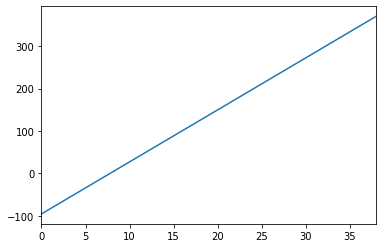

In [766]:

pd.Series(predictions).plot()

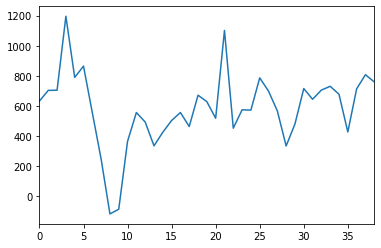

In [767]:
pd.Series(y_test.ravel()).plot()

In [768]:
svm_estimator.coef_[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.33690139,
        0.        ,  0.37690139,  0.        ,  0.        ,  0.        ,
        0.35690139, -0.06309861,  0.        ,  0.38690139,  0.        ,
        0.        ,  0.        , -0.16309861,  0.        ,  0.38690139,
        0.        ,  0.        ,  0.        ,  0.        , -0.07309861,
        0.34690139, -0.15      , -0.07      ,  0.38690139,  0.        ,
        0.33690139,  0.34690139, -0.14309861,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 12.27196952])

In [769]:
uk_measures_ = measures_.loc[measures_["country"] == 'United Kingdom']

In [772]:
pd.set_option('display.max_rows', None)
uk_measures_

country                                            measure  \
15176  United Kingdom                                  Economic measures   
15177  United Kingdom             Strengthening the public health system   
15178  United Kingdom                  Isolation and quarantine policies   
15179  United Kingdom                            Limit public gatherings   
15180  United Kingdom                            General recommendations   
15181  United Kingdom                                   Schools closure    
15182  United Kingdom                            General recommendations   
15183  United Kingdom                            Limit public gatherings   
15184  United Kingdom                            General recommendations   
15185  United Kingdom                            Limit public gatherings   
15186  United Kingdom                            Limit public gatherings   
15187  United Kingdom             Strengthening the public health system   
15188  United Kingdom                  Isolation and quarantine policies   
15189  United Kingdom                                  Economic measures   
15190  United Kingdom                                  Economic measures   
15191  United Kingdom                                  Economic measures   
15192  United Kingdom                                   Partial lockdown   
15193  United Kingdom          Closure of businesses and public services   
15194  United Kingdom                            Limit public gatherings   
15195  United Kingdom                        Surveillance and monitoring   
15196  United Kingdom          Closure of businesses and public services   
15197  United Kingdom                            Limit public gatherings   
15198  United Kingdom                            Limit public gatherings   
15199  United Kingdom                            Limit public gatherings   
15200  United Kingdom                                   Partial lockdown   
15201  United Kingdom                            Limit public gatherings   
15202  United Kingdom  Emergency administrative structures activated ...   
15203  United Kingdom                            Limit public gatherings   
15204  United Kingdom                 Changes in prison-related policies   
15205  United Kingdom                            General recommendations   
15206  United Kingdom              Other public health measures enforced   
15207  United Kingdom                        Surveillance and monitoring   
15208  United Kingdom  Emergency administrative structures activated ...   
15209  United Kingdom                                  Economic measures   
15210  United Kingdom  Emergency administrative structures activated ...   
15211  United Kingdom              Other public health measures enforced   
15212  United Kingdom                                  Economic measures   
15213  United Kingdom                                     Testing policy   
15214  United Kingdom                                  Economic measures   
15215  United Kingdom                                  Economic measures   
15216  United Kingdom                                  Economic measures   
15217  United Kingdom                                  Economic measures   
15218  United Kingdom                                  Economic measures   
15219  United Kingdom                                  Economic measures   
15220  United Kingdom                                     Testing policy   
15221  United Kingdom                  Isolation and quarantine policies   
15222  United Kingdom                            Limit public gatherings   
15223  United Kingdom                                   Schools closure    
15224  United Kingdom                                   Schools closure    
15225  United Kingdom          Closure of businesses and public services   
15226  United Kingdom                                  Economic measures   
15227  United Kingdom                            Limit public 